<h4><font color='#F55905'> <u>BUSINESS PROBLEM:</u></font><center><br><br><font color='#15657F'>PREDICTING THE RETAIL CUSTOMER RETENTION POTENTIAL LEVEL AS HIGH/MEDIUM/LOW CUSTOMER SEGMENTATION & PATTERN EXTRACTION</font></center></h4>
Retail company draws the attention of the customers through captivating continual conversations for not facing attrition(customer churn) or drop outs in the halfway. Primary focus should be on profitability, retention, production volumes, loss of potential revenue, imposing additional costs on assets, most importantly CRM factor.
Retailers create the metric to find out the services that they need without loosing them through analysis the historical data and once they are outdated from the plan, we have to try regain them back.
We have to focus on medium level customers by satisfying their needs because they are accountable, proactive, reactive in terms of demanding. If they are satisfied, can renewal their plans and the continuity with the company 
So let's deep dive into the patterns and emphasizing concept further.
<h4><font color='#F55905'><u>MACHINE LEARNING PROBLEM:</u></font><center><br><br><font color='#15657F'>USE A CLASSIFICATION MODEL TO PREDICT THE LIKELYHOOD OF A LIABILITY CUSTOMER RETENTION POTENTIAL LEVEL AS HIGH/MEDIUM/LOW</font></center></h4>

In [4]:
import os
import random
import itertools
import pandas  as pd
pd.set_option('display.max_columns', 500)
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="darkgrid")

from IPython import display
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import plotly.io as pio
from plotly import tools

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

<h4><font color='#E1ADA2'><u>PROJECT WORKFLOW</u></font>

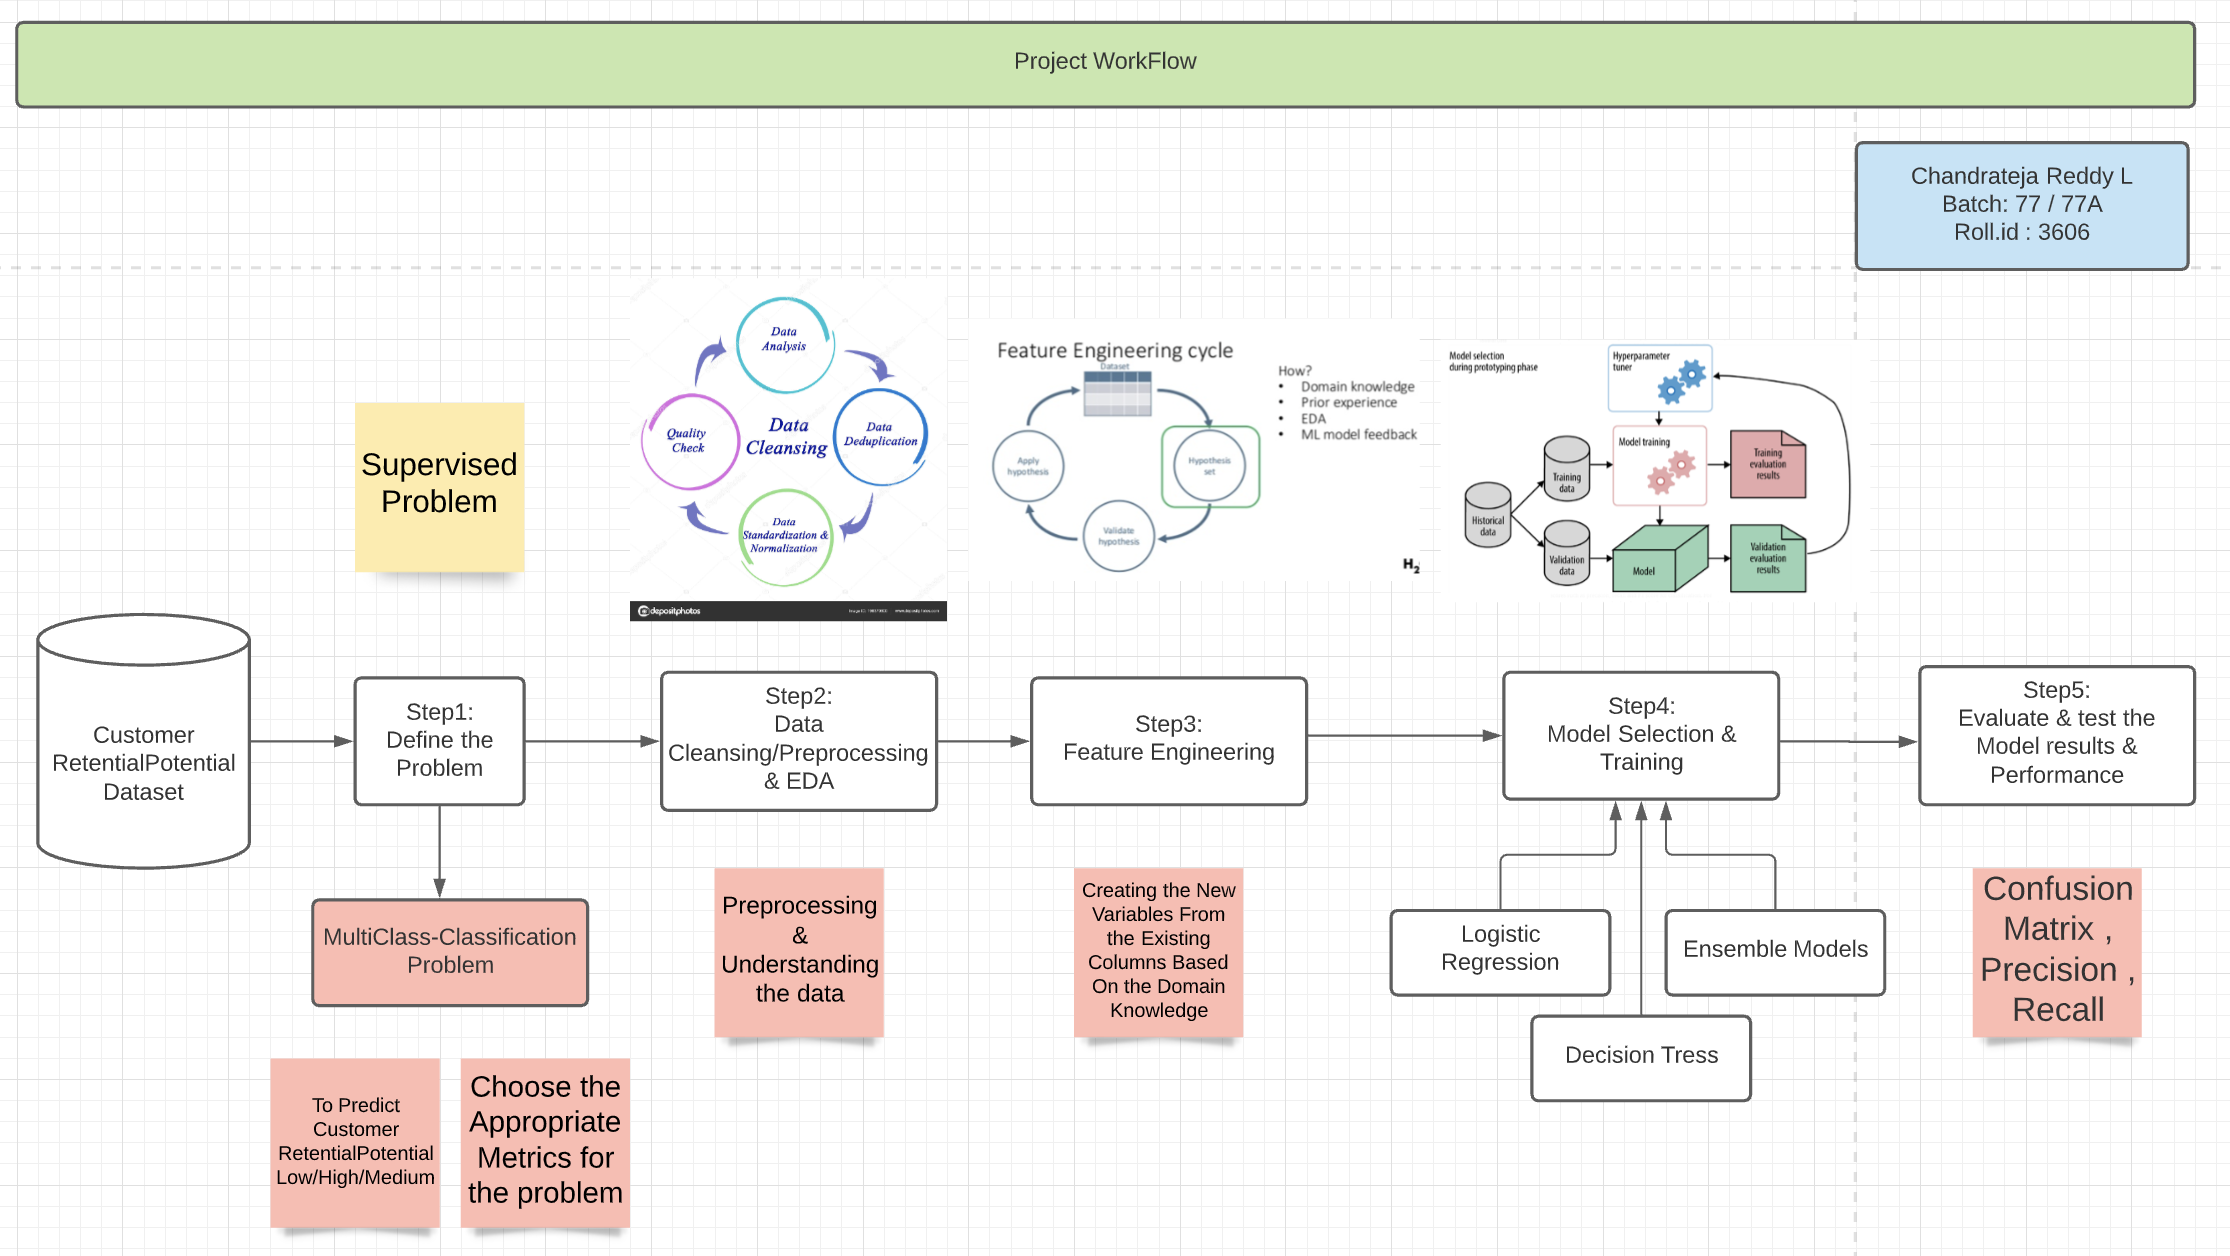

In [ ]:
display.Image("./project WorkFlow.png")

#### <font color='#E1ADA2'><u>PREDICTIONS FLOW</u></font>

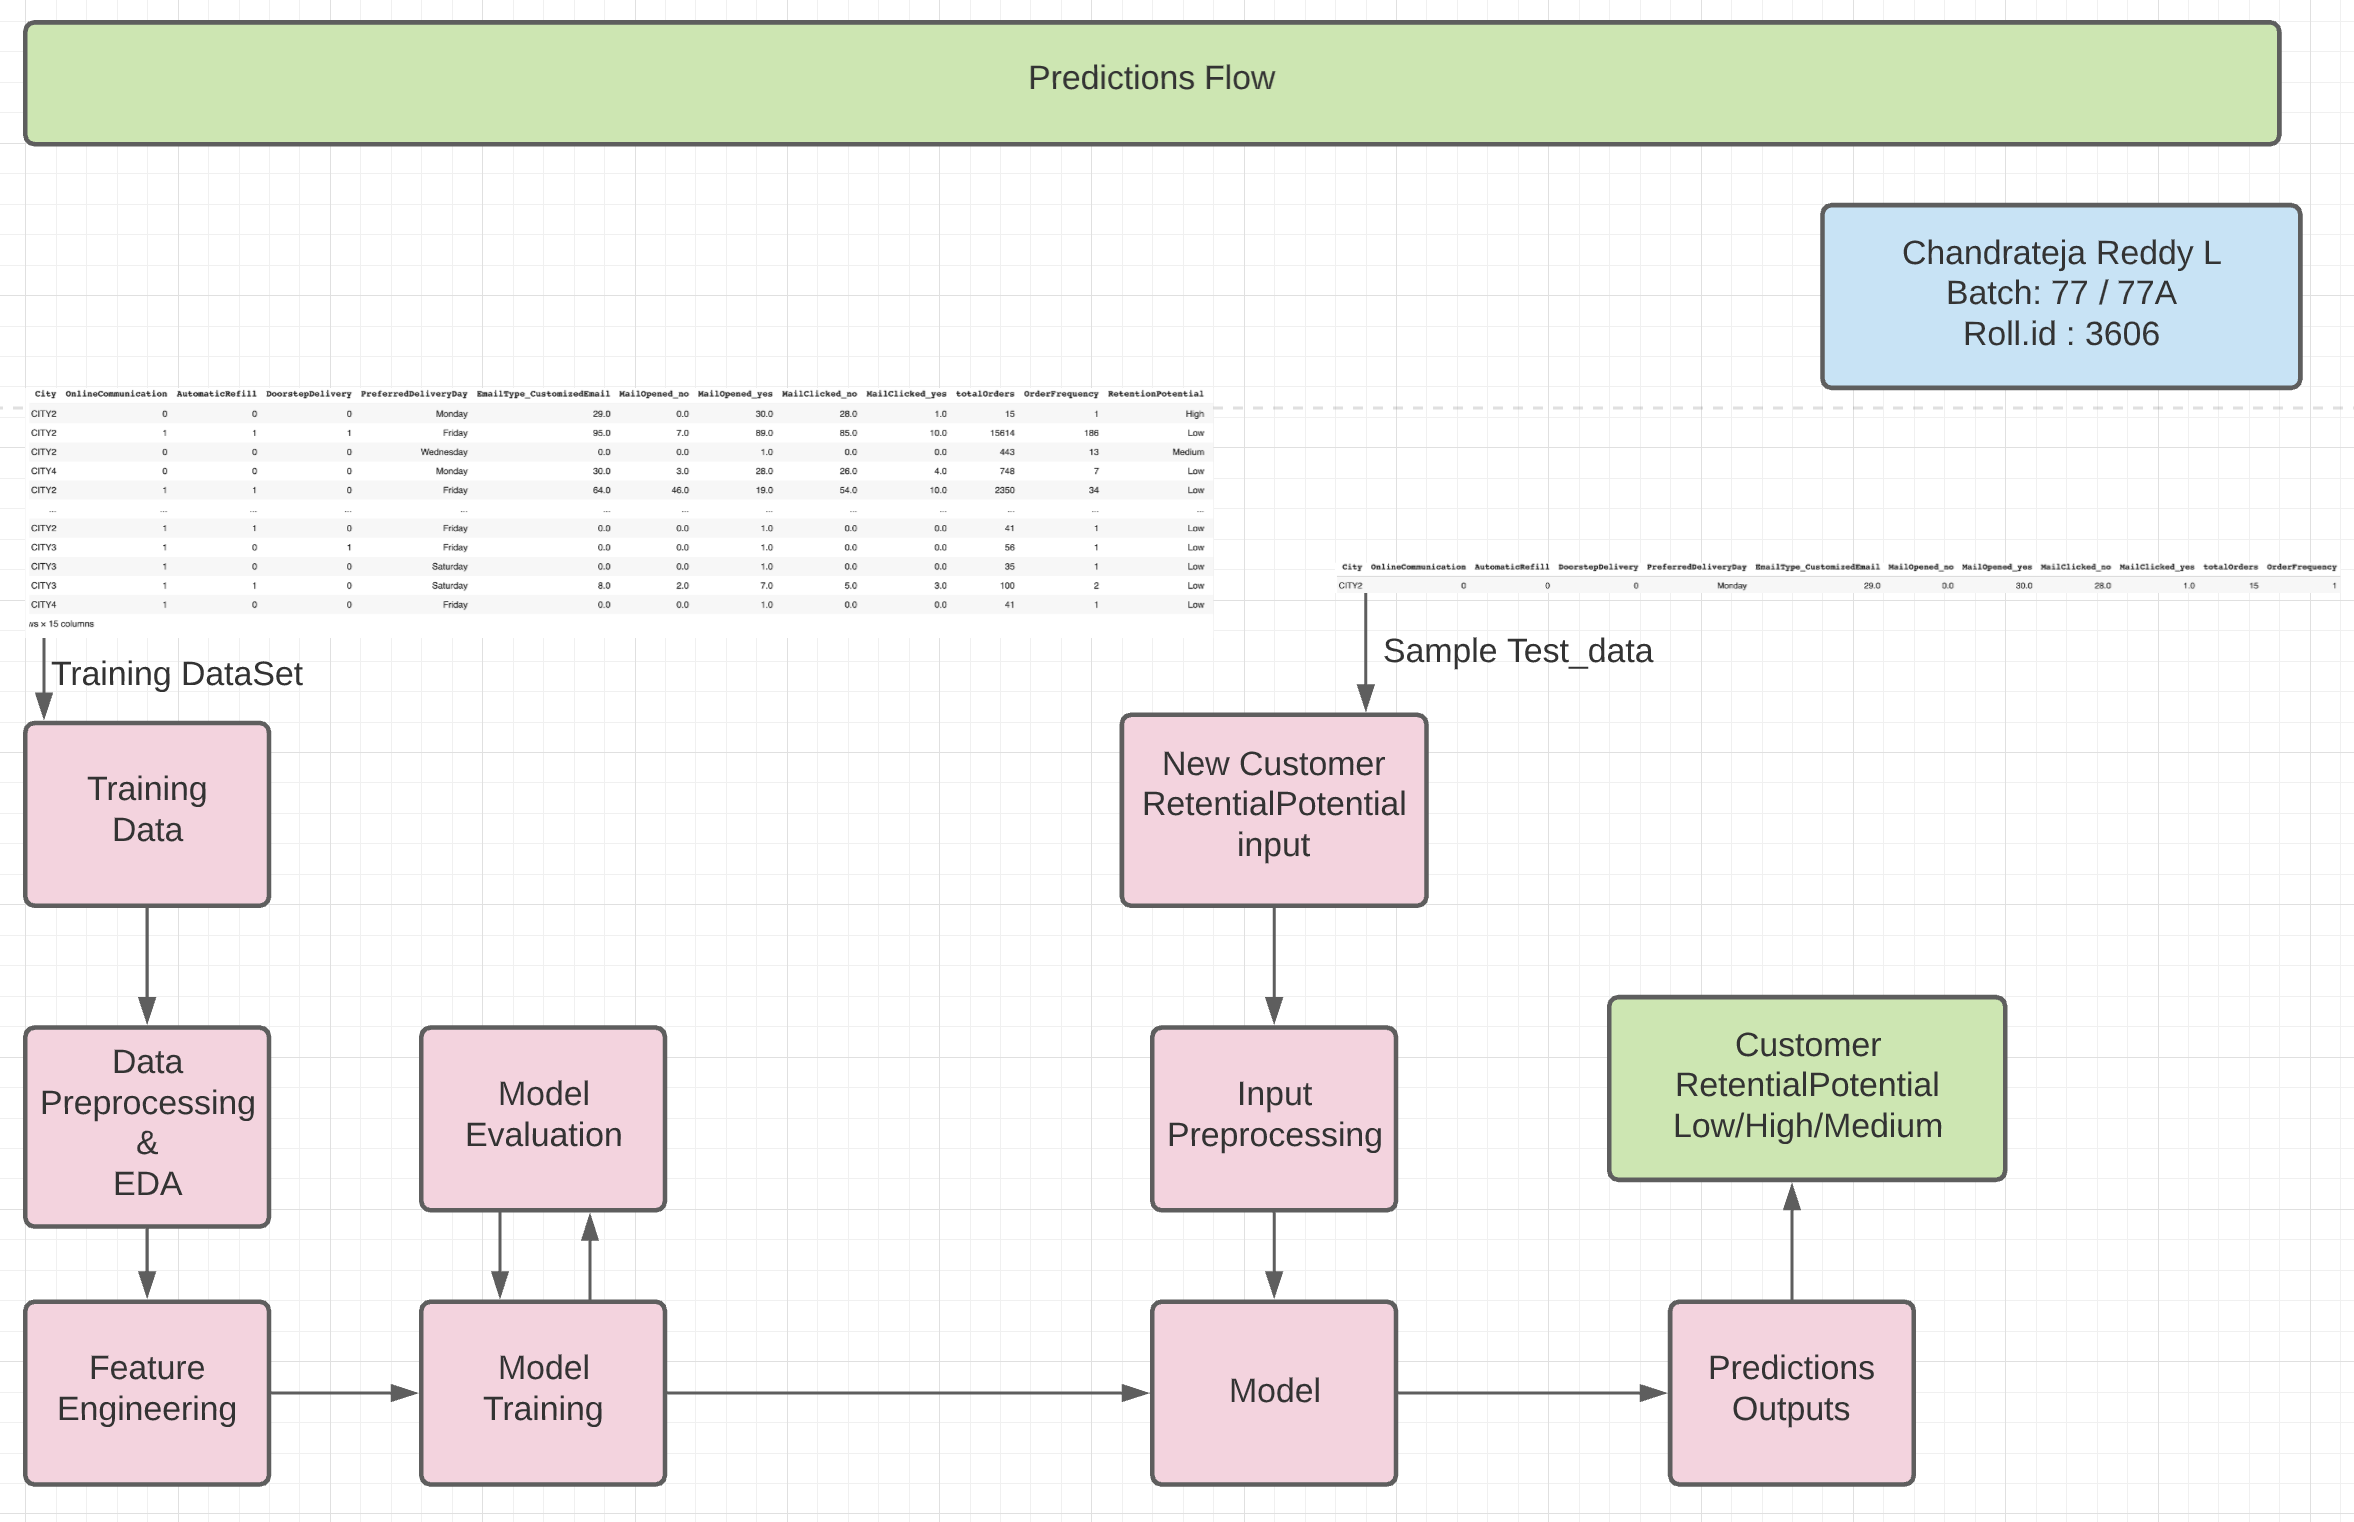

In [ ]:
display.Image("./Predictions Flow.png")

- <font color='#E1ADA2'>Classification Report Method</font>

In [5]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

- <font color='#E1ADA2'>Model Selection Method</font>

In [6]:
def model_selection(classifier, name, X_train, y_train,X_test,y_test):
    
    classifier.fit(X_train, y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['Train_Accuracy'] = accuracy_score(y_train,pred_train)
    results_dict['Valid_Accuracy'] = accuracy_score(y_test,pred_test)


    
    return(results_dict)

- <font color='#E1ADA2'>Recall,Precision,Accuracy Method</font>

In [7]:
from sklearn.metrics import recall_score,accuracy_score,precision_score

scores = pd.DataFrame(columns=['Model','Train_Accuracy','Test_Accuracy','Train_Recall_macro','Test_Recall_macro','Train_Precision_macro','Test_Precision_macro'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    
    train_accuracy   = accuracy_score(train_actual,train_predicted)
    test_accuracy   = accuracy_score(test_actual,test_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average='macro')
    test_recall   = recall_score(test_actual,test_predicted,average='macro')
    train_precision   = recall_score(train_actual,train_predicted,average='macro')
    test_precision   = recall_score(test_actual,test_predicted,average='macro')
    dataframe = dataframe.append(pd.Series([model_description,train_accuracy,test_accuracy,train_recall,
                                            test_recall,train_precision,test_precision],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

- <font color='#E1ADA2'>Confusion Metrix Method</font>

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <font  color = #E1ADA2 > **Loading the Data** <font>

In [38]:
customer_data = pd.read_excel('./TrainData/Customerdata_Train.xlsx')
email_data = pd.read_excel('./TrainData/Emaildata_Train.xlsx')
train_data = pd.read_excel('./TrainData//Train.xlsx')
transactions_data = pd.read_excel('./TrainData/transactionsdata_Train.xlsx')

In [39]:
c_data = customer_data.copy()
e_data = email_data.copy()
t_data = train_data.copy()
trans_data = transactions_data.copy()

### <font  color = #E1ADA2 > **Dummifying the Categorical Variables** <font>

In [40]:
e_data = pd.get_dummies(data=e_data, columns=['EmailType', 'MailOpened','MailClicked'])

#### <font  color = #E1ADA2 > **FEATURE ENGINEERING** <font>
- Dropping the CustomerID Column
- Checking the EmailType data

In [41]:
e_data = e_data.groupby('CustomerID').sum()

In [42]:
e_data.head()

EmailType_CustomizedEmail  EmailType_WelcomeEmail  MailOpened_no  \
CustomerID                                                                     
C12116                           31.0                     1.0           27.0   
C12117                            0.0                     1.0            0.0   
C12118                            0.0                     1.0            0.0   
C12119                           41.0                     1.0           28.0   
C12120                            0.0                     1.0            0.0   

            MailOpened_yes  MailClicked_NotApplicable  MailClicked_no  \
CustomerID                                                              
C12116                 5.0                        1.0            29.0   
C12117                 1.0                        1.0             0.0   
C12118                 1.0                        1.0             0.0   
C12119                14.0                        1.0            37.0   
C12120                 1.0                        1.0             0.0   

            MailClicked_yes  
CustomerID                   
C12116                  2.0  
C12117                  0.0  
C12118                  0.0  
C12119                  4.0  
C12120                  0.0

- Checking the EmailType data

In [43]:
email_data[email_data["EmailType"] =='WelcomeEmail']

CustomerID DateOfemail     EmailType timestamp MailOpened    MailClicked
0         C16368  2012-09-28  WelcomeEmail  15:56:50        yes  NotApplicable
1         C20345  2010-12-19  WelcomeEmail  15:10:30        yes  NotApplicable
2         C17683  2010-10-03  WelcomeEmail  17:12:24        yes  NotApplicable
3         C18647  2010-11-27  WelcomeEmail  16:59:02        yes  NotApplicable
4         C36692  2009-12-04  WelcomeEmail  17:27:22        yes  NotApplicable
...          ...         ...           ...       ...        ...            ...
23815     C23511  2018-01-17  WelcomeEmail  14:09:30        yes  NotApplicable
23816     C12197  2018-01-17  WelcomeEmail  15:45:26        yes  NotApplicable
23817     C40967  2018-01-17  WelcomeEmail  15:17:08        yes  NotApplicable
23818     C36140  2018-01-17  WelcomeEmail  15:17:08        yes  NotApplicable
23819     C42003  2018-01-17  WelcomeEmail  13:45:06        yes  NotApplicable

[23820 rows x 6 columns]

- Converting DateOfemail Column to datetime type

In [44]:
email_data["DateOfemail"] =pd.to_datetime(email_data["DateOfemail"])

##### <font  color = #E1ADA2 > **Aggregating the email_data** <font>
- Created welcomeEmailDate & RecentInteraction Date columns from the existing DateOfemail column

In [45]:
email_date = email_data.groupby('CustomerID').agg(welcomeEmailDate=('DateOfemail', np.min), RecentInteraction=('DateOfemail', np.max))

In [46]:
email_date.head()

welcomeEmailDate RecentInteraction
CustomerID                                   
C12116           2013-09-23        2013-10-09
C12117           2013-12-05        2013-12-05
C12118           2013-09-10        2013-09-10
C12119           2013-04-13        2013-10-21
C12120           2014-01-10        2014-01-10

- Merging the email data and aggregated email data

In [47]:
email = e_data.merge(email_date, how='inner', on='CustomerID')
email.head()

EmailType_CustomizedEmail  EmailType_WelcomeEmail  MailOpened_no  \
CustomerID                                                                     
C12116                           31.0                     1.0           27.0   
C12117                            0.0                     1.0            0.0   
C12118                            0.0                     1.0            0.0   
C12119                           41.0                     1.0           28.0   
C12120                            0.0                     1.0            0.0   

            MailOpened_yes  MailClicked_NotApplicable  MailClicked_no  \
CustomerID                                                              
C12116                 5.0                        1.0            29.0   
C12117                 1.0                        1.0             0.0   
C12118                 1.0                        1.0             0.0   
C12119                14.0                        1.0            37.0   
C12120                 1.0                        1.0             0.0   

            MailClicked_yes welcomeEmailDate RecentInteraction  
CustomerID                                                      
C12116                  2.0       2013-09-23        2013-10-09  
C12117                  0.0       2013-12-05        2013-12-05  
C12118                  0.0       2013-09-10        2013-09-10  
C12119                  4.0       2013-04-13        2013-10-21  
C12120                  0.0       2014-01-10        2014-01-10

##### <font  color = #E1ADA2 > **Aggregating the Transaction Data** <font>
- Created totalOrders & OrderFrequency columns from the existing OrderQuantity column
- Created firstOrder & lastOrder date columns from the existing DateOfOrder column    

In [48]:
trans_order = trans_data.groupby('CustomerID').agg(totalOrders=('OrderQuantity', np.sum),OrderFrequency = ('OrderQuantity',np.count_nonzero ))

In [49]:
trans_date = trans_data.groupby('CustomerID').agg(firstOrder=('DateOfOrder', np.min), lastOrder=('DateOfOrder', np.max))

- Merging the transaction data and aggregated transaction data

In [50]:
transactions = trans_order.merge(trans_date, on = 'CustomerID', how= 'inner')
transactions.head()

totalOrders  OrderFrequency  firstOrder   lastOrder
CustomerID                                                     
C12116              115               3  2013-10-03  2013-10-10
C12117               41               1  2013-12-05  2013-12-05
C12118               41               1  2013-09-10  2013-09-10
C12119               52               1  2013-10-22  2013-10-22
C12120               31               1  2014-01-10  2014-01-10

- Merging the transaction data and email data

In [51]:
data = email.merge(transactions, on = 'CustomerID' , how=  'inner')
data.head()

EmailType_CustomizedEmail  EmailType_WelcomeEmail  MailOpened_no  \
CustomerID                                                                     
C12116                           31.0                     1.0           27.0   
C12117                            0.0                     1.0            0.0   
C12118                            0.0                     1.0            0.0   
C12119                           41.0                     1.0           28.0   
C12120                            0.0                     1.0            0.0   

            MailOpened_yes  MailClicked_NotApplicable  MailClicked_no  \
CustomerID                                                              
C12116                 5.0                        1.0            29.0   
C12117                 1.0                        1.0             0.0   
C12118                 1.0                        1.0             0.0   
C12119                14.0                        1.0            37.0   
C12120                 1.0                        1.0             0.0   

            MailClicked_yes welcomeEmailDate RecentInteraction  totalOrders  \
CustomerID                                                                    
C12116                  2.0       2013-09-23        2013-10-09          115   
C12117                  0.0       2013-12-05        2013-12-05           41   
C12118                  0.0       2013-09-10        2013-09-10           41   
C12119                  4.0       2013-04-13        2013-10-21           52   
C12120                  0.0       2014-01-10        2014-01-10           31   

            OrderFrequency  firstOrder   lastOrder  
CustomerID                                          
C12116                   3  2013-10-03  2013-10-10  
C12117                   1  2013-12-05  2013-12-05  
C12118                   1  2013-09-10  2013-09-10  
C12119                   1  2013-10-22  2013-10-22  
C12120                   1  2014-01-10  2014-01-10

- Merging the Customer data with Combined Transaction,Email data

In [52]:
data = customer_data.merge(data, on = 'CustomerID' , how=  'inner')
data.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
0                 0               Monday                       29.0   
1                 1               Friday                       95.0   
2                 0            Wednesday                        0.0   
3                 0               Monday                       30.0   
4                 0               Friday                       64.0   

   EmailType_WelcomeEmail  MailOpened_no  MailOpened_yes  \
0                     1.0            0.0            30.0   
1                     1.0            7.0            89.0   
2                     1.0            0.0             1.0   
3                     1.0            3.0            28.0   
4                     1.0           46.0            19.0   

   MailClicked_NotApplicable  MailClicked_no  MailClicked_yes  \
0                        1.0            28.0              1.0   
1                        1.0            85.0             10.0   
2                        1.0             0.0              0.0   
3                        1.0            26.0              4.0   
4                        1.0            54.0             10.0   

  welcomeEmailDate RecentInteraction  totalOrders  OrderFrequency  firstOrder  \
0       2012-09-28        2013-07-25           15               1  2013-08-11   
1       2010-12-19        2013-12-19        15614             186  2011-04-01   
2       2010-10-03        2010-10-03          443              13  2010-12-01   
3       2010-11-27        2012-12-17          748               7  2010-11-29   
4       2009-12-04        2014-01-16         2350              34  2011-09-21   

    lastOrder  
0  2013-08-11  
1  2014-01-19  
2  2011-07-06  
3  2013-01-28  
4  2014-01-16

- Merging the train data(having labels with coressponding CustomerID) with Combined Transaction,Email data,customer data

In [53]:
final_data = data.merge(train_data,  on = 'CustomerID' , how=  'inner')
final_data.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
0                 0               Monday                       29.0   
1                 1               Friday                       95.0   
2                 0            Wednesday                        0.0   
3                 0               Monday                       30.0   
4                 0               Friday                       64.0   

   EmailType_WelcomeEmail  MailOpened_no  MailOpened_yes  \
0                     1.0            0.0            30.0   
1                     1.0            7.0            89.0   
2                     1.0            0.0             1.0   
3                     1.0            3.0            28.0   
4                     1.0           46.0            19.0   

   MailClicked_NotApplicable  MailClicked_no  MailClicked_yes  \
0                        1.0            28.0              1.0   
1                        1.0            85.0             10.0   
2                        1.0             0.0              0.0   
3                        1.0            26.0              4.0   
4                        1.0            54.0             10.0   

  welcomeEmailDate RecentInteraction  totalOrders  OrderFrequency  firstOrder  \
0       2012-09-28        2013-07-25           15               1  2013-08-11   
1       2010-12-19        2013-12-19        15614             186  2011-04-01   
2       2010-10-03        2010-10-03          443              13  2010-12-01   
3       2010-11-27        2012-12-17          748               7  2010-11-29   
4       2009-12-04        2014-01-16         2350              34  2011-09-21   

    lastOrder RetentionPotential  
0  2013-08-11               High  
1  2014-01-19                Low  
2  2011-07-06             Medium  
3  2013-01-28                Low  
4  2014-01-16                Low

- Created new column ***numberOfDaysWithBusiness*** by substracting the ***RecentInteraction*** & ***DateOfRegistration*** date columns

In [54]:
final_data['numberOfDaysWithBusiness'] =   final_data['RecentInteraction']-final_data['DateOfRegistration']

- Created new column ***makingBusiness*** by substracting the ***lastOrder*** & ***firstOrder*** date columns

In [55]:
final_data['makingBusiness'] = pd.to_datetime(final_data['lastOrder'])- pd.to_datetime(final_data['firstOrder'])

In [56]:
final_data['ordergap'] = pd.to_datetime(final_data['lastOrder']).max() -  pd.to_datetime(final_data['lastOrder'])

In [57]:
final_data['ordergap'] = final_data['ordergap'].dt.days
final_data['numberOfDaysWithBusiness'] = final_data['numberOfDaysWithBusiness'].dt.days
final_data['makingBusiness'] = final_data['makingBusiness'].dt.days

In [58]:
final_data.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C16368  CITY2         2012-09-28                    0                0   
1     C20345  CITY2         2010-12-19                    1                1   
2     C17683  CITY2         2010-10-03                    0                0   
3     C18647  CITY4         2010-11-27                    0                0   
4     C36692  CITY2         2009-12-04                    1                1   

   DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
0                 0               Monday                       29.0   
1                 1               Friday                       95.0   
2                 0            Wednesday                        0.0   
3                 0               Monday                       30.0   
4                 0               Friday                       64.0   

   EmailType_WelcomeEmail  MailOpened_no  MailOpened_yes  \
0                     1.0            0.0            30.0   
1                     1.0            7.0            89.0   
2                     1.0            0.0             1.0   
3                     1.0            3.0            28.0   
4                     1.0           46.0            19.0   

   MailClicked_NotApplicable  MailClicked_no  MailClicked_yes  \
0                        1.0            28.0              1.0   
1                        1.0            85.0             10.0   
2                        1.0             0.0              0.0   
3                        1.0            26.0              4.0   
4                        1.0            54.0             10.0   

  welcomeEmailDate RecentInteraction  totalOrders  OrderFrequency  firstOrder  \
0       2012-09-28        2013-07-25           15               1  2013-08-11   
1       2010-12-19        2013-12-19        15614             186  2011-04-01   
2       2010-10-03        2010-10-03          443              13  2010-12-01   
3       2010-11-27        2012-12-17          748               7  2010-11-29   
4       2009-12-04        2014-01-16         2350              34  2011-09-21   

    lastOrder RetentionPotential  numberOfDaysWithBusiness  makingBusiness  \
0  2013-08-11               High                       300               0   
1  2014-01-19                Low                      1096            1024   
2  2011-07-06             Medium                         0             217   
3  2013-01-28                Low                       751             791   
4  2014-01-16                Low                      1504             848   

   ordergap  
0      1624  
1      1463  
2      2391  
3      1819  
4      1466

##### <font  color = #E1ADA2 > **About Data** <font>

In [59]:
def red_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0),
                       "Levels":data.apply(lambda x: str(x.unique()),axis = 0),"Null_values":data.isnull().sum(),'null%':(data.isnull().sum()/100),'skewness':data.skew(),'kurtosis':data.kurt()})
red_data(final_data)

Data Type  No of Unique Data  \
AutomaticRefill                     int64                  2   
City                               object                  4   
CustomerID                         object              23820   
DateOfRegistration         datetime64[ns]               2673   
DoorstepDelivery                    int64                  2   
EmailType_CustomizedEmail         float64                 84   
EmailType_WelcomeEmail            float64                  1   
MailClicked_NotApplicable         float64                  1   
MailClicked_no                    float64                 80   
MailClicked_yes                   float64                 30   
MailOpened_no                     float64                 70   
MailOpened_yes                    float64                 61   
OnlineCommunication                 int64                  2   
OrderFrequency                      int64                151   
PreferredDeliveryDay               object                  7   
RecentInteraction          datetime64[ns]               2425   
RetentionPotential                 object                  3   
firstOrder                         object               2530   
lastOrder                          object               2279   
makingBusiness                      int64               1152   
numberOfDaysWithBusiness            int64               1302   
ordergap                            int64               2279   
totalOrders                         int64               2206   
welcomeEmailDate           datetime64[ns]               2673   

                                                                      Levels  \
AutomaticRefill                                                        [0 1]   
City                                       ['CITY2' 'CITY4' 'CITY3' 'CITY1']   
CustomerID                 ['C16368' 'C20345' 'C17683' ... 'C40967' 'C361...   
DateOfRegistration         ['2012-09-28T00:00:00.000000000' '2010-12-19T0...   
DoorstepDelivery                                                       [0 1]   
EmailType_CustomizedEmail  [ 29.  95.   0.  30.  64.  34.  48.  40.  69. ...   
EmailType_WelcomeEmail                                                  [1.]   
MailClicked_NotApplicable                                               [1.]   
MailClicked_no             [ 28.  85.   0.  26.  54.  31.  47.  22.  67. ...   
MailClicked_yes            [ 1. 10.  0.  4.  3. 18.  2.  9.  7.  5.  6. 2...   
MailOpened_no              [ 0.  7.  3. 46.  2.  8.  5. 67. 24. 14. 18. 4...   
MailOpened_yes             [ 30.  89.   1.  28.  19.  33.  41.  36.   3. ...   
OnlineCommunication                                                    [0 1]   
OrderFrequency             [  1 186  13   7  34 137 100  86  69  75 130  ...   
PreferredDeliveryDay       ['Monday' 'Friday' 'Wednesday' 'Tuesday' 'Thur...   
RecentInteraction          ['2013-07-25T00:00:00.000000000' '2013-12-19T0...   
RetentionPotential                                   ['High' 'Low' 'Medium']   
firstOrder                 ['2013-08-11' '2011-04-01' '2010-12-01' ... '2...   
lastOrder                  ['2013-08-11' '2014-01-19' '2011-07-06' ... '2...   
makingBusiness                           [   0 1024  217 ... 1310  250  458]   
numberOfDaysWithBusiness                 [ 300 1096    0 ...  536 1008 1043]   
ordergap                                 [1624 1463 2391 ...   23   52   27]   
totalOrders                        [   15 15614   443 ...   710  2160  2142]   
welcomeEmailDate           ['2012-09-28T00:00:00.000000000' '2010-12-19T0...   

                           Null_values  null%   skewness    kurtosis  
AutomaticRefill                      0    0.0   2.768410    5.664570  
City                                 0    0.0        NaN         NaN  
CustomerID                           0    0.0        NaN         NaN  
DateOfRegistration                   0    0.0        NaN         NaN  
DoorstepDelivery                     0    0.0   4.860749   21.628699  
Emai

In [60]:
date_viz = final_data.copy()

In [61]:
final_data = final_data[['CustomerID', 'City', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'EmailType_CustomizedEmail', 'MailOpened_no',
       'MailOpened_yes', 'MailClicked_no',
       'MailClicked_yes',
       'totalOrders', 'OrderFrequency',
       'RetentionPotential', 'numberOfDaysWithBusiness', 'makingBusiness','ordergap']]

In [62]:
final_data.head()

CustomerID   City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C16368  CITY2                    0                0                 0   
1     C20345  CITY2                    1                1                 1   
2     C17683  CITY2                    0                0                 0   
3     C18647  CITY4                    0                0                 0   
4     C36692  CITY2                    1                1                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0               Monday                       29.0            0.0   
1               Friday                       95.0            7.0   
2            Wednesday                        0.0            0.0   
3               Monday                       30.0            3.0   
4               Friday                       64.0           46.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0            30.0            28.0              1.0           15   
1            89.0            85.0             10.0        15614   
2             1.0             0.0              0.0          443   
3            28.0            26.0              4.0          748   
4            19.0            54.0             10.0         2350   

   OrderFrequency RetentionPotential  numberOfDaysWithBusiness  \
0               1               High                       300   
1             186                Low                      1096   
2              13             Medium                         0   
3               7                Low                       751   
4              34                Low                      1504   

   makingBusiness  ordergap  
0               0      1624  
1            1024      1463  
2             217      2391  
3             791      1819  
4             848      1466

##### <font  color = #E1ADA2 > **Statistics Of The Data** <font>

In [63]:
final_data.describe()

OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
count         23820.000000     23820.000000      23820.000000   
mean              0.660411         0.094710          0.037615   
std               0.473580         0.292821          0.190268   
min               0.000000         0.000000          0.000000   
25%               0.000000         0.000000          0.000000   
50%               1.000000         0.000000          0.000000   
75%               1.000000         0.000000          0.000000   
max               1.000000         1.000000          1.000000   

       EmailType_CustomizedEmail  MailOpened_no  MailOpened_yes  \
count               23820.000000   23820.000000    23820.000000   
mean                   20.732662      15.525273        6.207389   
std                    20.040546      17.239732        8.517405   
min                     0.000000       0.000000        1.000000   
25%                     0.000000       0.000000        1.000000   
50%                    19.000000       7.000000        2.000000   
75%                    40.000000      32.000000        8.000000   
max                   291.000000      91.000000      256.000000   

       MailClicked_no  MailClicked_yes   totalOrders  OrderFrequency  \
count    23820.000000     23820.000000  23820.000000    23820.000000   
mean        19.563854         1.168808    357.622922        4.397271   
std         19.168208         2.376062   1335.649680       12.142408   
min          0.000000         0.000000      0.000000        0.000000   
25%          0.000000         0.000000     41.000000        1.000000   
50%         17.000000         0.000000     65.000000        1.000000   
75%         38.000000         1.000000    169.000000        3.000000   
max        249.000000        42.000000  51429.000000      257.000000   

       numberOfDaysWithBusiness  makingBusiness      ordergap  
count              23820.000000    23820.000000  23820.000000  
mean                 110.178212       86.941352   1426.425945  
std                  248.978523      220.576316    675.530359  
min                    0.000000        0.000000      0.000000  
25%                    0.000000        0.000000   1469.000000  
50%                    7.000000        0.000000   1543.000000  
75%                   73.000000       42.000000   1663.000000  
max                 1989.000000     1985.000000   3463.000000

## <font  color = #E1ADA2 > **Data Visualizations** <font>

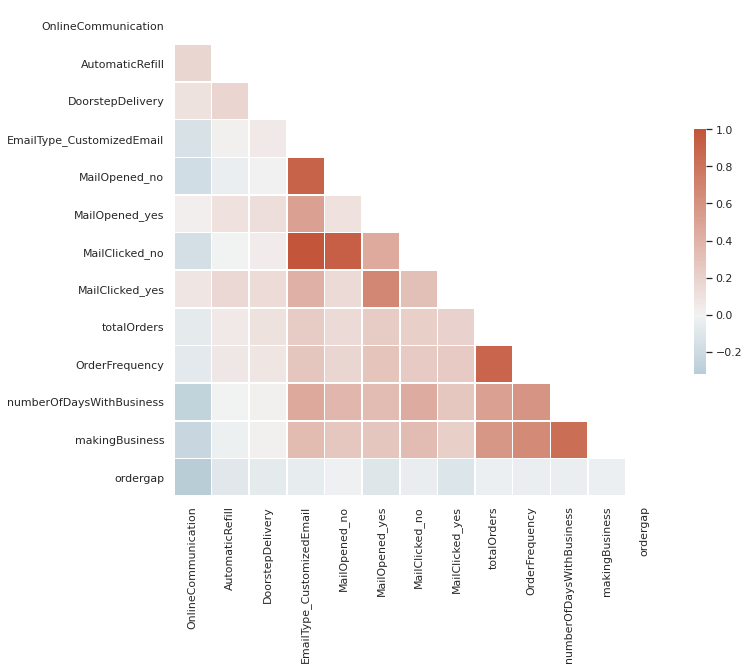

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = final_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Email_type_customized -> Mails clicked&opned is slightly correlated. Mails not clicked&opened is highly correlated. When the Emails are Customized, the mails has not been clicked and obviously not opened if they haven't clicked. 
- Mail_opened_No -> Mail_clicked_No (high correlation) If the mails are not opened, that means they haven't clicked on it. - Total_Orders -> Order_Frequency (Maximally correlated) Order frequency is a metric that helps to define how often customers purchase from a store in a given period of time. Order Freqency = Total orders / total number of unique customers - Order Freqency -> Making business (Maximally correlated) If order Frequnecy is more, we can make bussiness, coreelated in terms of profitabilty.
- No of Days with bussiness -> Making business (Highly correlated) If no of bussiness days are more, obviously we can make more bussiness by efforts we put in to get profits.
- Online Communication -> Making bussiness & no of days with bussiness. (less correlation) If the communication is done through online, customers tend to buy less so that bussiness impacts. also the bussiness days reduces from usual.
- AutomaticRefill -> Order Frequnecy (less correlation) If restocking of items are less, the order frequency might also get lesser.

- <font  color = #E1ADA2 > Box Plots to check **Outliers** in the data <font>

OnlineCommunication             AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AutomaticRefill              AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
DoorstepDelivery             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
EmailType_CustomizedEmail    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
MailOpened_no                AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
MailOpened_yes               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
MailClicked_no               AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
MailClicked_yes                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
totalOrders                     AxesSubplot(0.238415,0.125;0.0945122x0.343182)
OrderFrequency                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
numberOfDaysWithBusiness        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
makingBusiness                  AxesSubplot(0.578659,0.125;0.0945122x0.343182)
ordergap                        AxesSubplot(0.692073

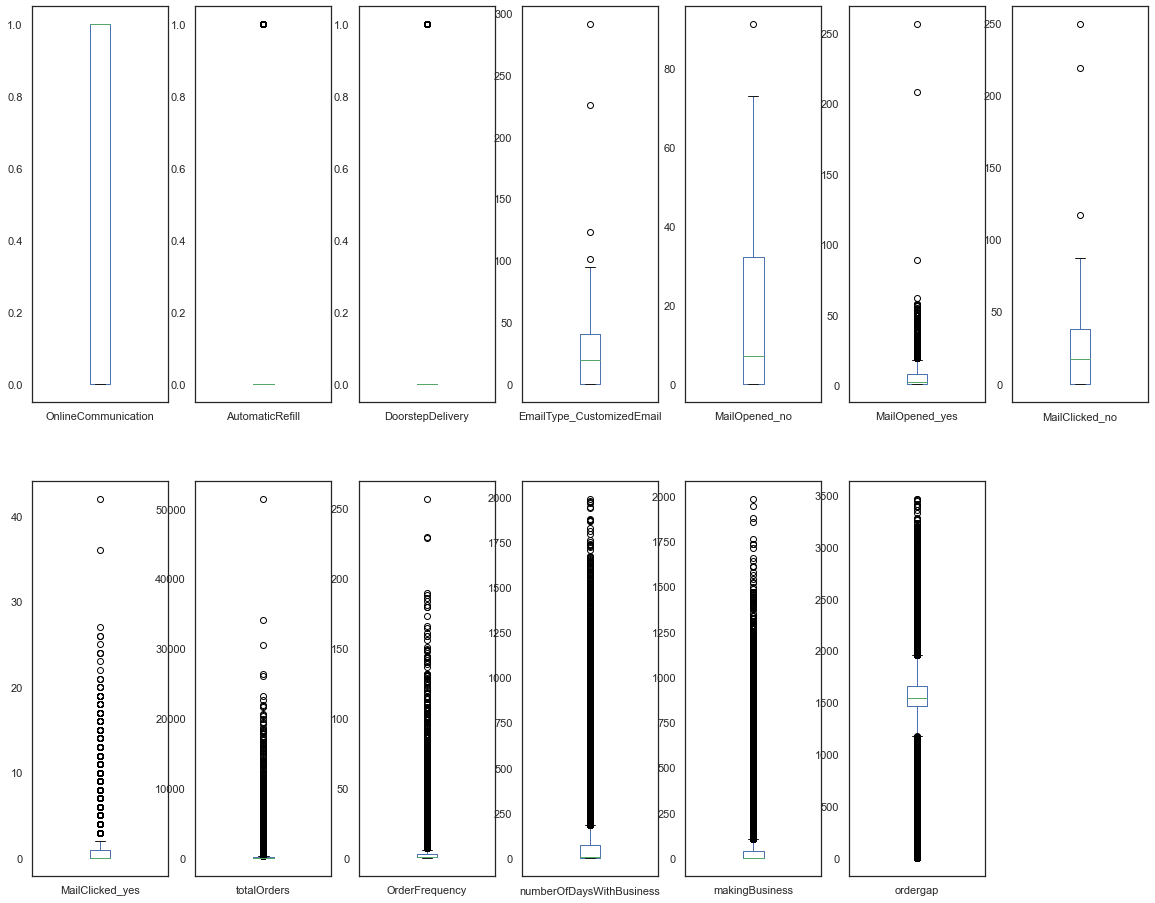

In [ ]:
final_data.plot(kind='box',layout=(2,7),subplots=1,figsize=(20,16))

#### Outliers has been detected excessively in
- Customers who clicked&Opened their mails.
- Company's TotalOrders & OrderFreqency.
- Bussiness perspective - no of days and bussiness making,ordergap

- Different Color names mentioned in the list

In [33]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

### <font  color = #E1ADA2 >**Checking the Frequency Of Each Categorical Variable**<font>

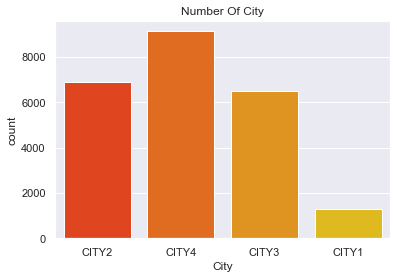

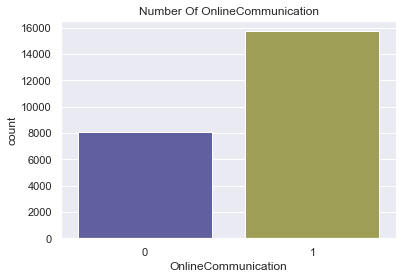

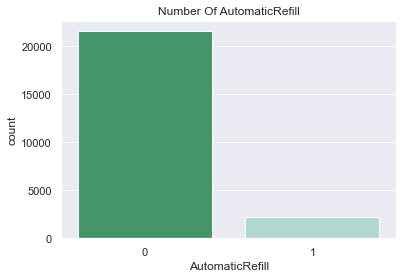

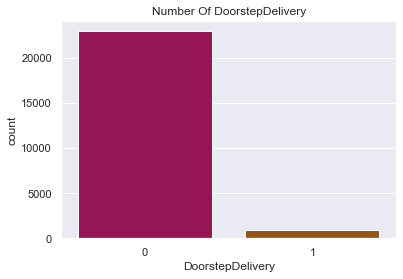

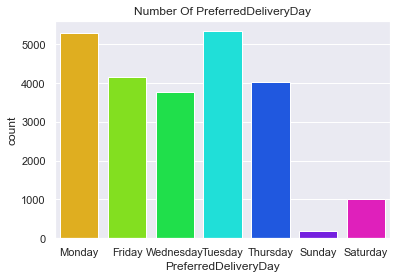

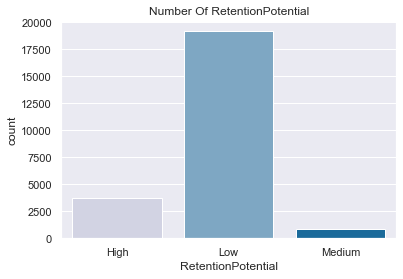

In [ ]:
columns = ['City','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay','RetentionPotential']
for col in columns:
    sns.countplot(x=col, data=final_data,palette=random.choice(colors))
    plt.title('Number Of {}'.format(col))
    plt.show()

- 'City 4' has the highest predominance compared to other states with almost over 9k customers.
- Customers has approched 'Online communication' and can see the surge for almost 15k.
- 'Automactic Refil' has not been spiked and that is minimal in restocking.
- Customers have not prefered 'Door step delivery'.
- Customers preferetially requested the 'Deliveryday' on Monday and Tuesday. There is a brigding balance between mon & tue. - The further 'Continuity(retention)' progress with the company is quite Low.That means the customers are onetime purchasers.

### <font  color = #E1ADA2 >**Comparision Plots**<font>
- Comparision Of Each Categorical Variable With Target Column

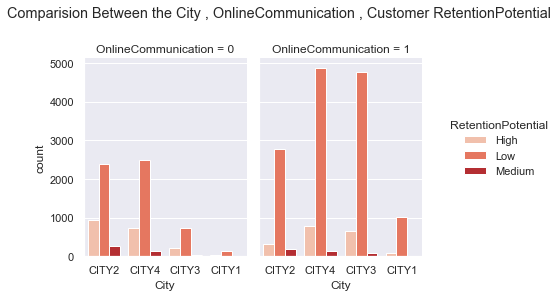

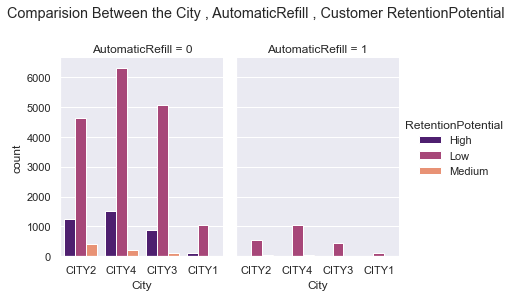

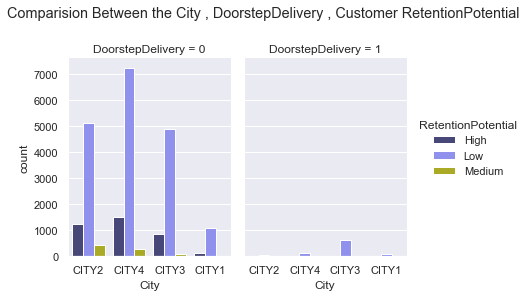

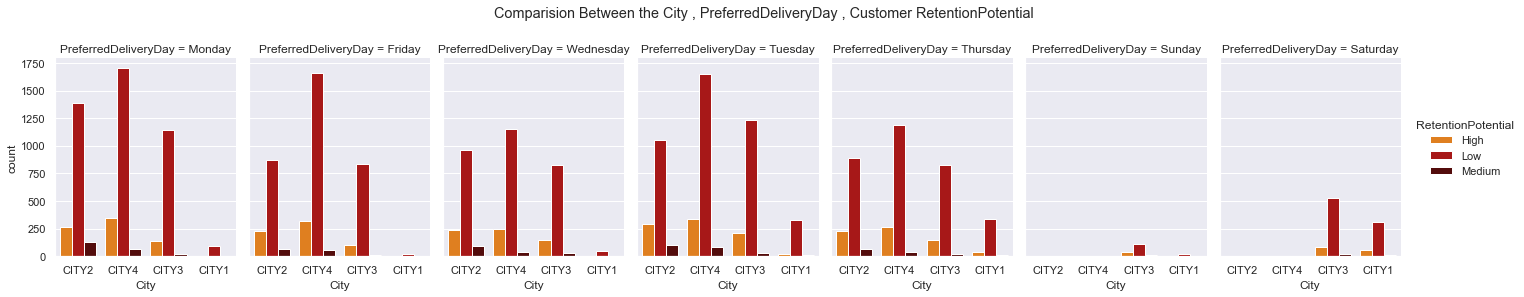

In [ ]:
#plt.title('Comparision Between the {},{} & Customer {}'.format(x,col,'RetentionPotential'))

columns = ['OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']
for i in columns:
    g = sns.catplot(x="City", hue="RetentionPotential", col=i,
                data=final_data, kind="count",
                height=4, aspect=.7,palette=random.choice(colors));
    g.fig.subplots_adjust(top=0.8) 
    g.fig.suptitle('Comparision Between the City , {} , Customer RetentionPotential'.format(i))


- Customers who has not conversed through 'online communication' tends to have the lowest Retention in City 4, Medium & Highest Retention in City 2. Customers who has conversed through 'online communication' tends to have the lowest & highest Retention in City 4, Medium retention in City 2 
- Automatic Refil & door step delivery No - low&high retention in city 4, medium retention in city 2. Yes - lowest retention in all cities.
- Prefered days for delivery in all the cities are on Monday & Tuesday

In [ ]:
final_data.head()

CustomerID   City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C16368  CITY2                    0                0                 0   
1     C20345  CITY2                    1                1                 1   
2     C17683  CITY2                    0                0                 0   
3     C18647  CITY4                    0                0                 0   
4     C36692  CITY2                    1                1                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0               Monday                       29.0            0.0   
1               Friday                       95.0            7.0   
2            Wednesday                        0.0            0.0   
3               Monday                       30.0            3.0   
4               Friday                       64.0           46.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0            30.0            28.0              1.0           15   
1            89.0            85.0             10.0        15614   
2             1.0             0.0              0.0          443   
3            28.0            26.0              4.0          748   
4            19.0            54.0             10.0         2350   

   OrderFrequency RetentionPotential numberOfDaysWithBusiness makingBusiness  
0               1               High                 300 days         0 days  
1             186                Low                1096 days      1024 days  
2              13             Medium                   0 days       217 days  
3               7                Low                 751 days       791 days  
4              34                Low                1504 days       848 days

In [ ]:
final_data[final_data['totalOrders'] >50000 ]

CustomerID   City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
237     C33945  CITY2                    1                1                 1   

    PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
237               Monday                       87.0           66.0   

     MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
237            22.0            87.0              0.0        51429   

     OrderFrequency RetentionPotential numberOfDaysWithBusiness makingBusiness  
237             230                Low                1970 days      1735 days

### <font  color = #E1ADA2 >**Line Plots**<font>


##### Here to mention
- The problem with plotly library is,when we download this jupyter file and converted to html.the diagrams related to plotly package will not be appear for that case.here, i'm loading the images that already performed on the data.if you want original images simply run the cell you will get those visualizations.

- <font  color = #E1ADA2 >**Total OrderFrequency By Day**<font>

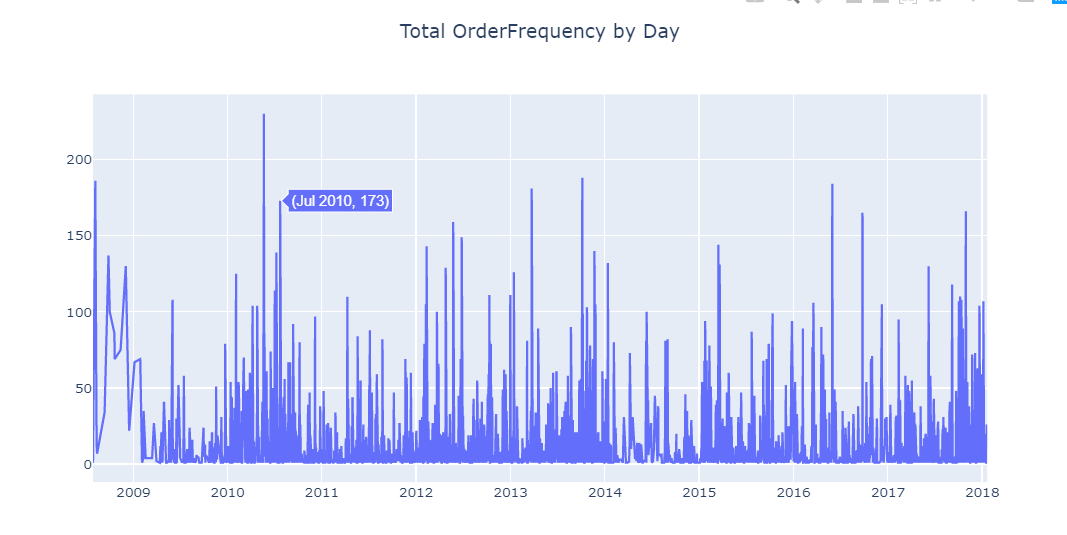

In [ ]:

date_viz['firstOrder']= pd.to_datetime(date_viz['firstOrder'])
#df['Ship Date']= pd.to_datetime(df['Ship Date'])

daily_quantity = date_viz.groupby('firstOrder')['OrderFrequency'].count().reset_index()

trace0 = go.Scatter(x=daily_quantity['firstOrder'], y=date_viz['OrderFrequency'], name='nflx')
fig0 = go.Figure([trace0])
fig0.update_layout(
    title={
        'text': "Total OrderFrequency by Day",
        'x':0.5,
        'xanchor': 'center'})
fig0.show()
display.Image("./images/total_orderfrequency_vs_day.png")

- Order sales has seen more in the year 2010, because in 2008 the recession started and to cover up economically it has taken a plunge in 2010 eventually. Markets set up marginally again in 2012 and then followed by 2014-15

- <font  color = #E1ADA2 >**Total lastOrder By Day**<font>

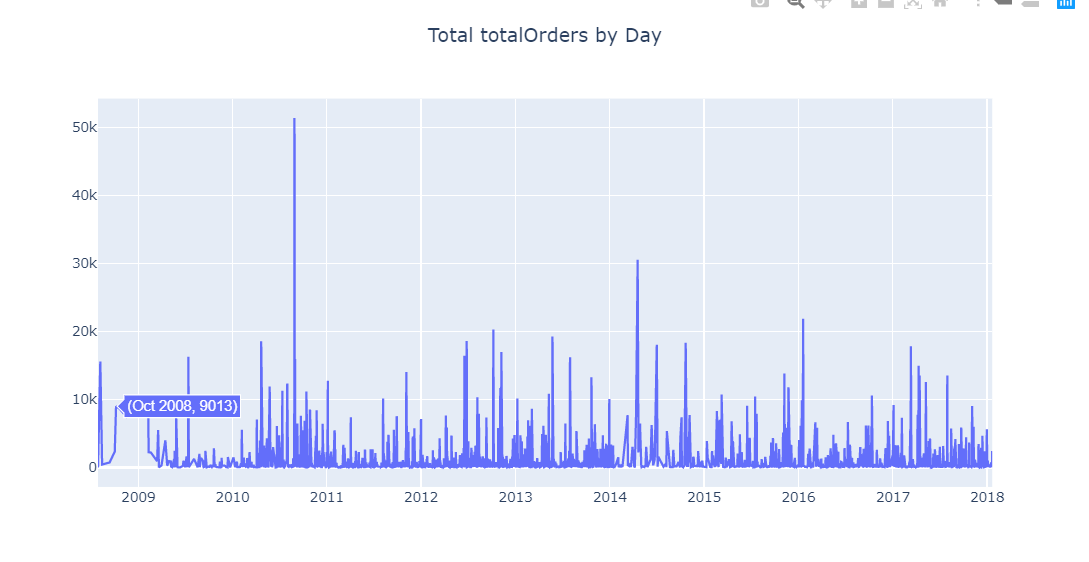

In [ ]:

date_viz['lastOrder']= pd.to_datetime(date_viz['lastOrder'])
#df['Ship Date']= pd.to_datetime(df['Ship Date'])

daily_quantity = date_viz.groupby('lastOrder')['totalOrders'].min().reset_index()

trace0 = go.Scatter(x=daily_quantity['lastOrder'], y=date_viz['totalOrders'], name='nflx')
fig0 = go.Figure([trace0])
fig0.update_layout(
    title={
        'text': "Total totalOrders by Day",
        'x':0.5,
        'xanchor': 'center'})
fig0.show()
display.Image("./images/totalorder_vs_day.png")

- Total order were more seen in period 2010-11, 2014-15.In rest all years it is fluctuating with inflation and deflation

- <font  color = #E1ADA2 >**TotalOrders By Year,Month,DayOfWeek,Month**<font>

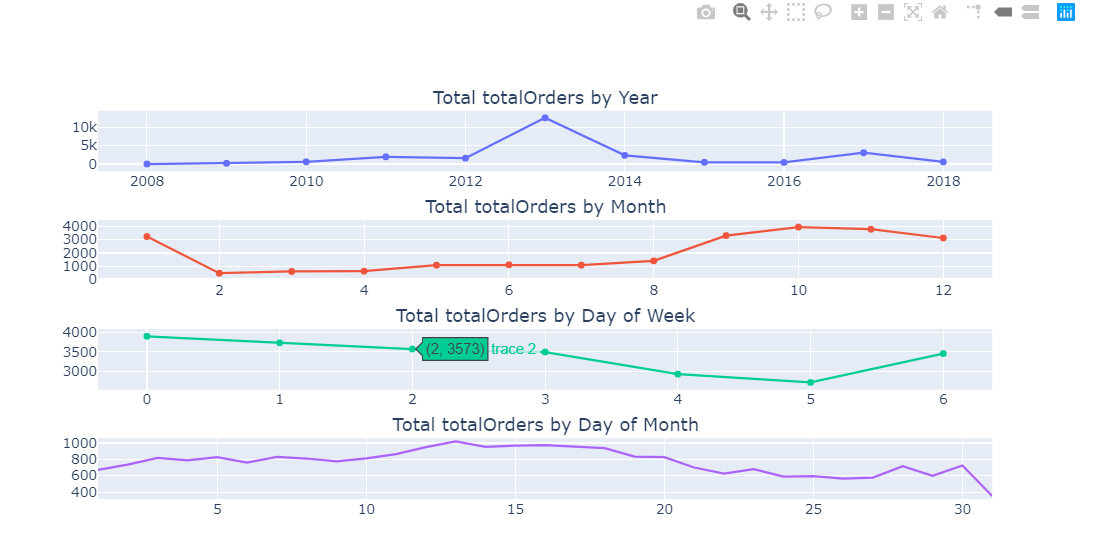

In [ ]:
date_viz['year'] = date_viz['RecentInteraction'].dt.year
date_viz['month'] = date_viz['RecentInteraction'].dt.month
date_viz['dow'] = date_viz['RecentInteraction'].dt.dayofweek
date_viz['day'] = date_viz['RecentInteraction'].dt.day

trace0 = go.Scatter(x=date_viz.groupby('year')['totalOrders'].count().index, y=date_viz.groupby('year')['totalOrders'].count().values)
trace1 = go.Scatter(x=date_viz.groupby('month')['totalOrders'].count().index, y=date_viz.groupby('month')['totalOrders'].count().values)
trace2 = go.Scatter(x=date_viz.groupby('dow')['totalOrders'].count().index, y=date_viz.groupby('dow')['totalOrders'].count().values)
trace3 = go.Scatter(x=date_viz.groupby('day')['totalOrders'].count().index, y=date_viz.groupby('day')['totalOrders'].count().values)

fig1 = tools.make_subplots(rows=4, cols=1, subplot_titles=('Total totalOrders by Year', 'Total totalOrders by Month', 'Total totalOrders by Day of Week', 'Total totalOrders by Day of Month'))
fig1.append_trace(trace0, 1,1)
fig1.append_trace(trace1, 2,1)
fig1.append_trace(trace2, 3,1)
fig1.append_trace(trace3, 4,1)
fig1['layout'].update(title='', showlegend=False)   

fig1

display.Image("./images/totalorders.png")



- Annual wise-  total orders were witnessing more in the period of 2012 and again falling down in the year 2014.

- Monthly wise-  in the months from last two quarters which means from August to December, most of the festivals fall under these months and people tend to purchase more and in the month January, new year falls and hence the sales raises.

- Week wise- the sales are more in the weekends and it gradually steeps down in the weekdays.

- Day wise- the salary credits in the first week of the month, the sales immediately rises up to till the mid of the month and rapidly falls down in end of the month.

### <font  color = #E1ADA2 >**Scatter Plots**<font>
- <font  color = #E1ADA2 >**TotalOrders By CityWise**<font>

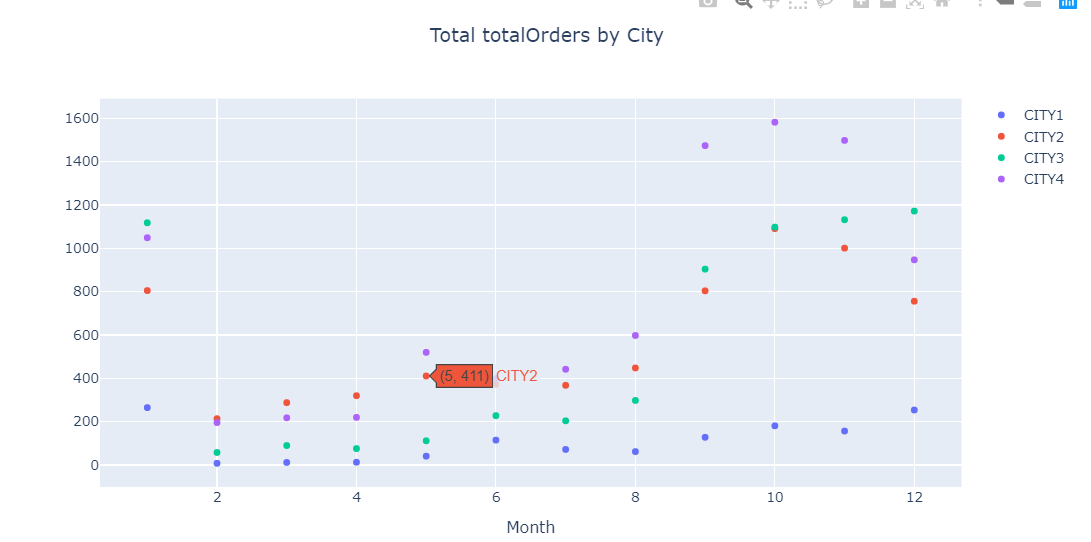

In [ ]:

def gen_scatter(region, col):
    return go.Scatter(
      x=date_viz[date_viz.City==region].groupby('month')[col].count().index,
      y=date_viz[date_viz.City==region].groupby('month')[col].count().values,
      name = region,
      mode='markers'
    )

data = [
    gen_scatter('CITY1', 'totalOrders'), 
    gen_scatter('CITY2', 'totalOrders'), 
    gen_scatter('CITY3', 'totalOrders'), 
    gen_scatter('CITY4', 'totalOrders')
]

layout = go.Layout(
    title={
        'text': "Total totalOrders by City",
        'x':0.5,
        'xanchor': 'center'}, xaxis = dict(title = 'Month')
)

fig4 = go.Figure(data=data, layout=layout)
fig4

display.Image("./images/city_vs_total_orders.png")


- Each city contribute each sales rate,  which means most of the cities falling under last two quarters and first month of the first quarter.

Text(0.5, 0.98, 'PreferredDeliveryDay vs totalOrders')

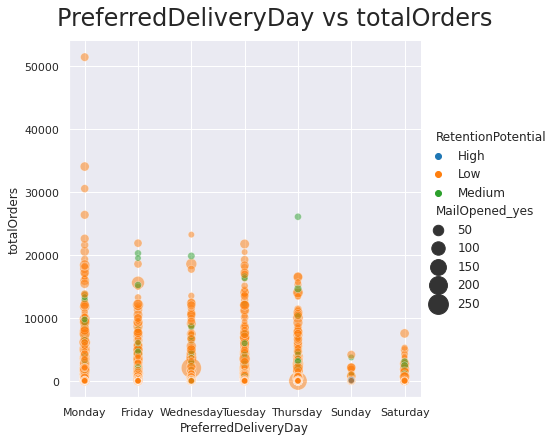

In [37]:
g = sns.relplot(x="PreferredDeliveryDay", y="totalOrders", hue="RetentionPotential", size="MailOpened_yes",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('PreferredDeliveryDay vs totalOrders',size=24)

- On wednesday, customer has opened mail but the retention potentiality with company is quite low.
- We have to concentrate more on medium rention customers, thats when we can hold them towards our company. On Thursady, opened the mail and retention potentiality is Medium can push them towards highest Rentention.
- On sunday, customer's rentention is high, but then he opened the mail for quite lesser times.Those are loyal customers to us and we cant loose them.

Text(0.5, 0.98, 'EmailType_CustomizedEmail vs totalOrders')

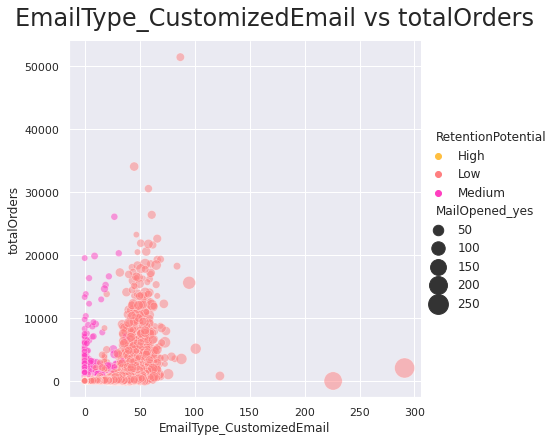

In [40]:
g = sns.relplot(x="EmailType_CustomizedEmail", y="totalOrders", hue="RetentionPotential", size="MailOpened_yes",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('EmailType_CustomizedEmail vs totalOrders',size=24)

- Customer who has been sent CustomizedEmail, have opened many times but the total orders he made was very less and thus has low retention
- Customer with medium retention, tend open the mails quite lesser and total order were also minimal.
- In the other context, there we have the person who has lowest retention yet more total orders.

In [41]:
final_data[final_data['EmailType_CustomizedEmail'] >250 ]

CustomerID   City  OnlineCommunication  AutomaticRefill  \
19338     C41705  CITY2                    1                0   

       DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
19338                 0            Wednesday                      291.0   

       MailOpened_no  MailOpened_yes  MailClicked_no  MailClicked_yes  \
19338           36.0           256.0           249.0             42.0   

       totalOrders  OrderFrequency RetentionPotential  \
19338         2081              37                Low   

       numberOfDaysWithBusiness  makingBusiness  ordergap  
19338                      1030             804        33

Text(0.5, 0.98, 'EmailType_CustomizedEmail vs MailClicked_yes')

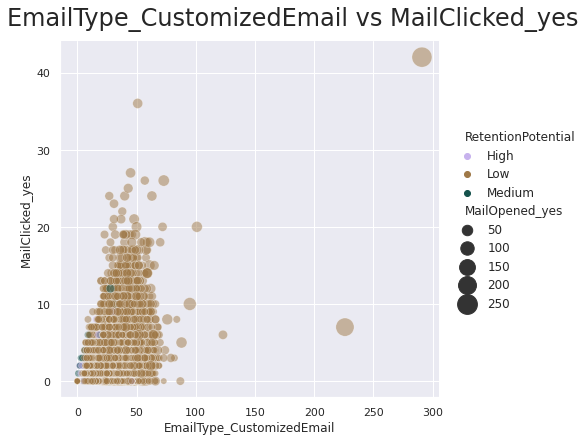

In [46]:
g = sns.relplot(x="EmailType_CustomizedEmail", y="MailClicked_yes", hue="RetentionPotential", size="MailOpened_yes",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('EmailType_CustomizedEmail vs MailClicked_yes',size=24)

- Thus the majority of the customizied emails have not been opened by many customers.

Text(0.5, 0.98, 'OrderFrequency vs TotalOrders')

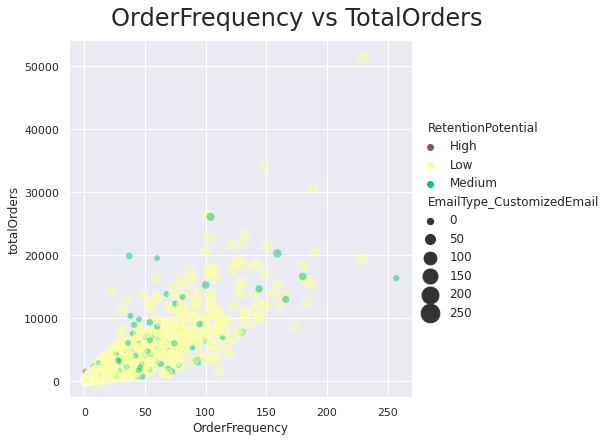

In [59]:
g = sns.relplot(x="OrderFrequency", y="totalOrders", hue="RetentionPotential", size="EmailType_CustomizedEmail",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('OrderFrequency vs TotalOrders',size=24)

- Customers who got customized emails having low retention potential have lesser orders

Text(0.5, 0.98, 'MailOpened_yes vs OrderFrequency')

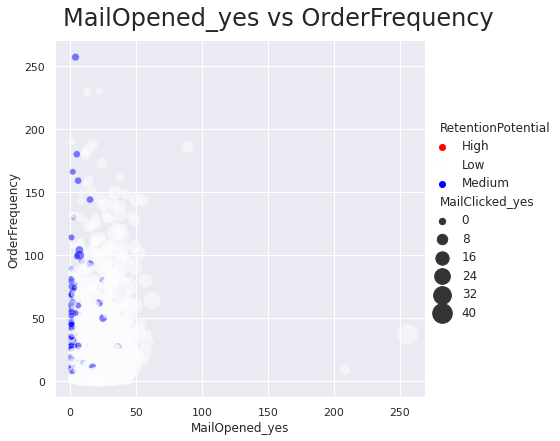

In [60]:
g = sns.relplot(x="MailOpened_yes", y="OrderFrequency", hue="RetentionPotential", size="MailClicked_yes",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('MailOpened_yes vs OrderFrequency',size=24)

- Customers who opened mails, their orders were quite minimal with low retention potentiality majorly.

Text(0.5, 0.98, 'MailOpened_yes vs totalOrders')

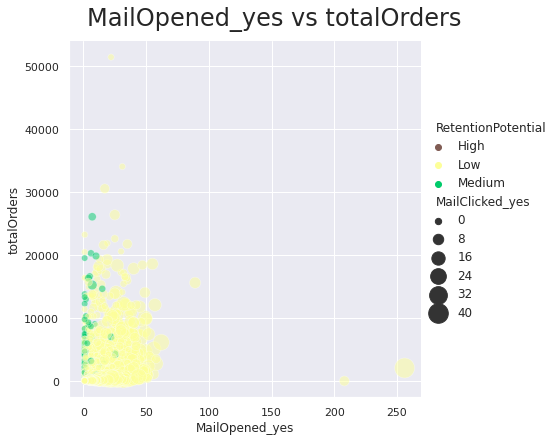

In [62]:
g = sns.relplot(x="MailOpened_yes", y="totalOrders", hue="RetentionPotential", size="MailClicked_yes",
            sizes=(40, 400), alpha=.5, palette=random.choice(colors),
            height=6, data=final_data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('MailOpened_yes vs totalOrders',size=24)

- Customers who clicked mails, their orders were quite minimal with low retention potentiality majorly.

### <font  color = #E1ADA2 >**Stripplot Plots**<font>
- <font  color = #E1ADA2 >**Comparision Between the TotalOrders & **<font>
    - PreferredDeliveryDay :
    - OnlineCommunication :
    - AutomaticRefill :
    - DoorstepDelivery :

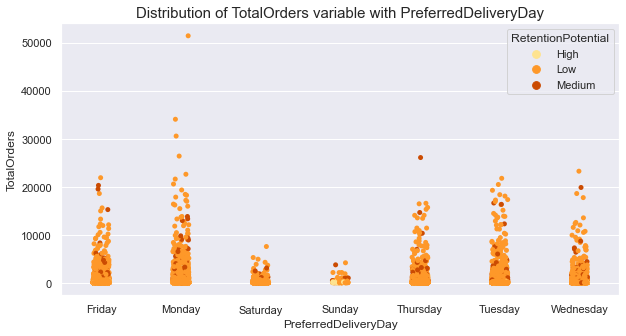

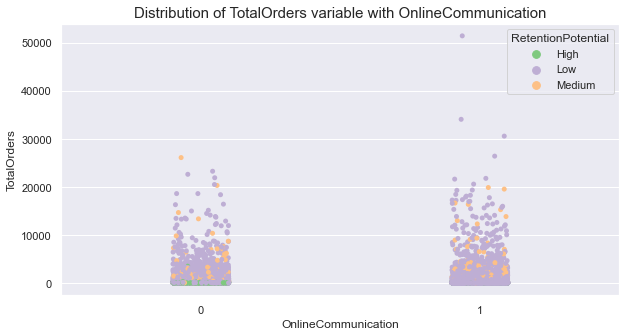

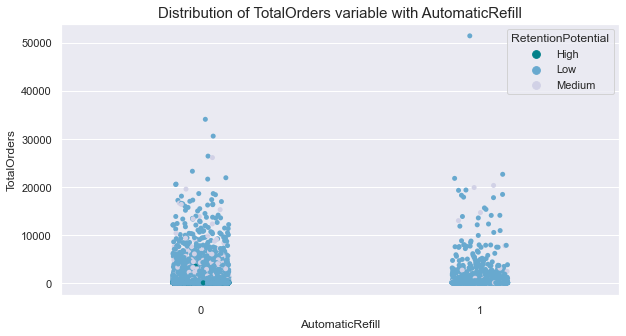

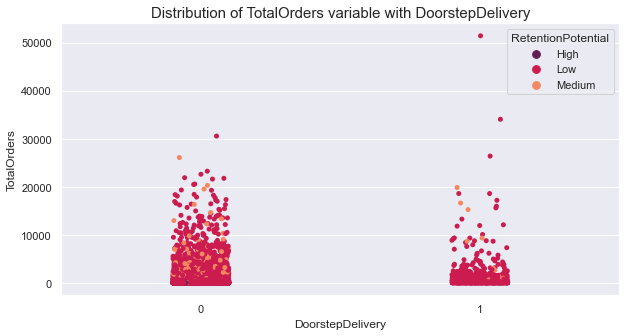

In [ ]:
columns = ['PreferredDeliveryDay','OnlineCommunication','AutomaticRefill','DoorstepDelivery']
for cols in columns:
    #var_name = "PreferredDeliveryDay"
    col_order = np.sort(final_data[cols].unique()).tolist()
    plt.figure(figsize=(10,5))
    sns.stripplot(x=cols, y='totalOrders', data=final_data, order=col_order,hue = 'RetentionPotential',palette=random.choice(colors))
    plt.xlabel(cols, fontsize=12)
    plt.ylabel('TotalOrders', fontsize=12)
    plt.title("Distribution of TotalOrders variable with "+cols, fontsize=15)
    plt.show()

- Total orders are more on Monday & tuesday in weekdays with low & medium Rentention.
- In Online Communication-YES/NO, the total orders have taken place with low & medium Rentention.
- In Automatic refil-YES/NO, the total orders have taken place with low & medium Rentention.
- In Door step delivery, customers preffered their total orders to not to be done door delivery with Lowest and medium retention.

- #### <font  color = #E1ADA2 >**Comparision Between the OrderFrequency &**<font>
    - PreferredDeliveryDay :
    - OnlineCommunication :
    - AutomaticRefill :
    - DoorstepDelivery :

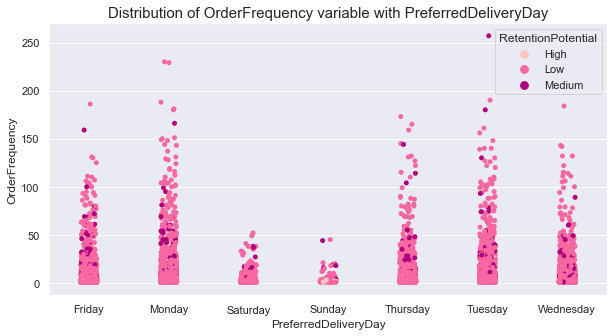

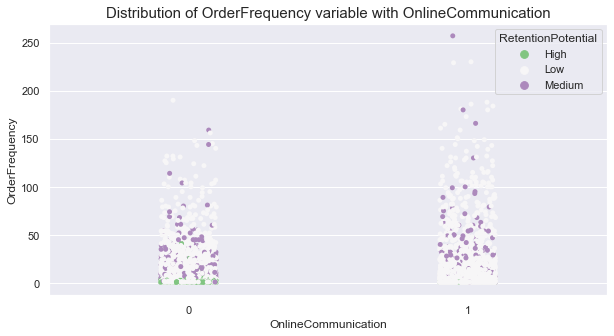

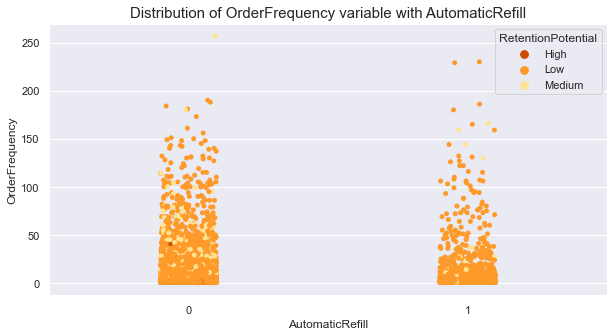

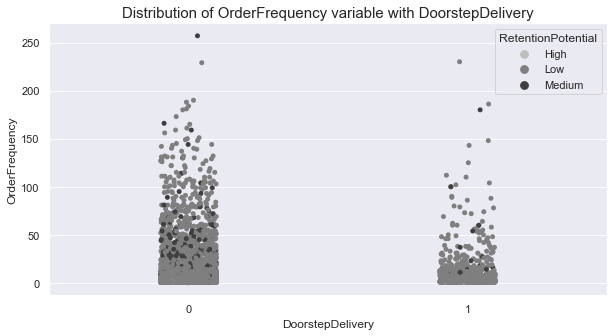

In [ ]:
columns = ['PreferredDeliveryDay','OnlineCommunication','AutomaticRefill','DoorstepDelivery']
for cols in columns:
    #var_name = "PreferredDeliveryDay"
    col_order = np.sort(final_data[cols].unique()).tolist()
    plt.figure(figsize=(10,5))
    sns.stripplot(x=cols, y='OrderFrequency', data=final_data, order=col_order,hue = 'RetentionPotential',palette=random.choice(colors))
    plt.xlabel(cols, fontsize=12)
    plt.ylabel('OrderFrequency', fontsize=12)
    plt.title("Distribution of OrderFrequency variable with "+cols, fontsize=15)
    plt.show()

- Order frequency are more on Monday & tuesday in weekdays with low & medium Rentention.
- In Online Communication-YES/NO, the order frequency have taken place with low & medium Rentention.
- In Automatic refil-YES/NO, the order frequency have taken place with low & medium Rentention.
- In Door step delivery, customers preffered their order frequency to not to be done door delivery with Lowest and medium retention.

### Preparing For ModelBuilding

In [29]:
df = final_data.drop('CustomerID',axis=1).copy()

In [30]:
df.head()

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0  CITY2                    0                0                 0   
1  CITY2                    1                1                 1   
2  CITY2                    0                0                 0   
3  CITY4                    0                0                 0   
4  CITY2                    1                1                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0               Monday                       29.0            0.0   
1               Friday                       95.0            7.0   
2            Wednesday                        0.0            0.0   
3               Monday                       30.0            3.0   
4               Friday                       64.0           46.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0            30.0            28.0              1.0           15   
1            89.0            85.0             10.0        15614   
2             1.0             0.0              0.0          443   
3            28.0            26.0              4.0          748   
4            19.0            54.0             10.0         2350   

   OrderFrequency RetentionPotential  numberOfDaysWithBusiness  \
0               1               High                       300   
1             186                Low                      1096   
2              13             Medium                         0   
3               7                Low                       751   
4              34                Low                      1504   

   makingBusiness  ordergap  
0               0      1624  
1            1024      1463  
2             217      2391  
3             791      1819  
4             848      1466

### <font  color = #E1ADA2 >**Spliting the data**<font>

In [31]:
from sklearn.model_selection import train_test_split

y = df['RetentionPotential']
X = df.loc[:, df.columns != 'RetentionPotential']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20, random_state=111,stratify = y)

print(X_train.shape, X_test.shape)

(19056, 15) (4764, 15)


In [63]:
y_train = y_train.map(dict(High=2, Low=0,Medium=1))
y_test = y_test.map(dict(High=2, Low=0,Medium=1))
print(y_train.shape, y_test.shape)

(19056,) (4764,)


In [64]:
num_cols = ["EmailType_CustomizedEmail", 'MailOpened_no', 'MailOpened_yes','MailClicked_no','MailClicked_yes','totalOrders','OrderFrequency','numberOfDaysWithBusiness','makingBusiness','ordergap']
cat_cols =['City', 'PreferredDeliveryDay']

In [65]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [66]:
X_train = pd.DataFrame(X_train)
X_test= pd.DataFrame(X_test)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

for col in cat_cols:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

- #### Pipeline to build base models

In [ ]:
models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           },
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           },
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           },
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           },
          {'name': 'svc', 'label': 'SVM',
           'classifier': SVC(class_weight='balanced',random_state=88),
           },
          {'name': 'Boosting', 'label': 'Xgboost',
           'classifier': xgb.XGBClassifier(class_weight='balanced',objective='multi:softmax',random_state = 88),
           }
          ]

In [ ]:
results_base = []
for m in models:    
    print(m['name'])    
    results_base.append(model_selection(m['classifier'], 
                                   m['name'],
                                   X_train, 
                                   y_train,X_test,y_test
                                  ))
    print('completed')

logreg
completed
knn
completed
dsc
completed
rf
completed
svc
completed
Boosting
[14:51:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


completed


- #### Base Models Results In DataFrame 

In [ ]:
results_base_models = pd.DataFrame(results_base).sort_values(by='Valid_Accuracy', ascending = False)
results_base_models

classifier_name  Train_Accuracy  Valid_Accuracy
5        Boosting        0.943168        0.891478
3              rf        0.984309        0.884131
2             dsc        0.984309        0.863560
1             knn        0.900346        0.859782
0          logreg        0.855111        0.852645
4             svc        0.686188        0.683459

## Base models tuning

### <font  color = #E1ADA2 >**Logistic Regression Tunning**<font>

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.854901058406524


In [ ]:
logreg_cv.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [ ]:
log_predict_train=logreg_cv.best_estimator_.predict(X_train)
log_predict_test=logreg_cv.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, log_predict_train, y_test, log_predict_test)
scores = get_metrics(y_train,log_predict_train,y_test,log_predict_test,'Logistic_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     15348
           1       0.87      0.35      0.50       703
           2       0.65      0.45      0.53      3005

    accuracy                           0.86     19056
   macro avg       0.80      0.59      0.65     19056
weighted avg       0.84      0.86      0.84     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3837
           1       0.86      0.38      0.53       176
           2       0.65      0.42      0.51       751

    accuracy                           0.85      4764
   macro avg       0.79      0.59      0.65      4764
weighted avg       0.84      0.85      0.84      4764



### <font  color = #E1ADA2 >**Decision tree Tunning**<font>

In [ ]:
dt_model = DecisionTreeClassifier(class_weight = 'balanced',random_state=88)
grid = {
        "max_depth":np.arange(14)+1,
        'criterion':['gini','entropy']
        }
grid_cv_dt = GridSearchCV(estimator=dt_model, param_grid=grid, cv=3,verbose=1)
grid_cv_dt.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.9s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=88),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [ ]:
grid_cv_dt.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, random_state=88)

In [ ]:
grid_cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [ ]:
dt_predict_train=grid_cv_dt.best_estimator_.predict(X_train)
dt_predict_test=grid_cv_dt.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, dt_predict_train, y_test, dt_predict_test)
#scores = get_metrics(y_train,dt_predict_train,y_test,dt_predict_test,'DecisionTrees_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     15348
           1       0.54      0.99      0.70       703
           2       0.62      0.74      0.68      3005

    accuracy                           0.86     19056
   macro avg       0.71      0.87      0.76     19056
weighted avg       0.88      0.86      0.87     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3837
           1       0.49      0.88      0.63       176
           2       0.61      0.76      0.68       751

    accuracy                           0.85      4764
   macro avg       0.68      0.83      0.74      4764
weighted avg       0.88      0.85      0.86      4764



### <font  color = #E1ADA2  t>**Saving Model to Pickle file**<font>

In [ ]:
import pickle

Pkl_Filename = "Models/DT.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_cv_dt.best_estimator_, file)

In [ ]:
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)

#### <font  color = #E1ADA2  t>**For to visualize Sample DecisionTrees I have considerd max_depth 2.**<font>

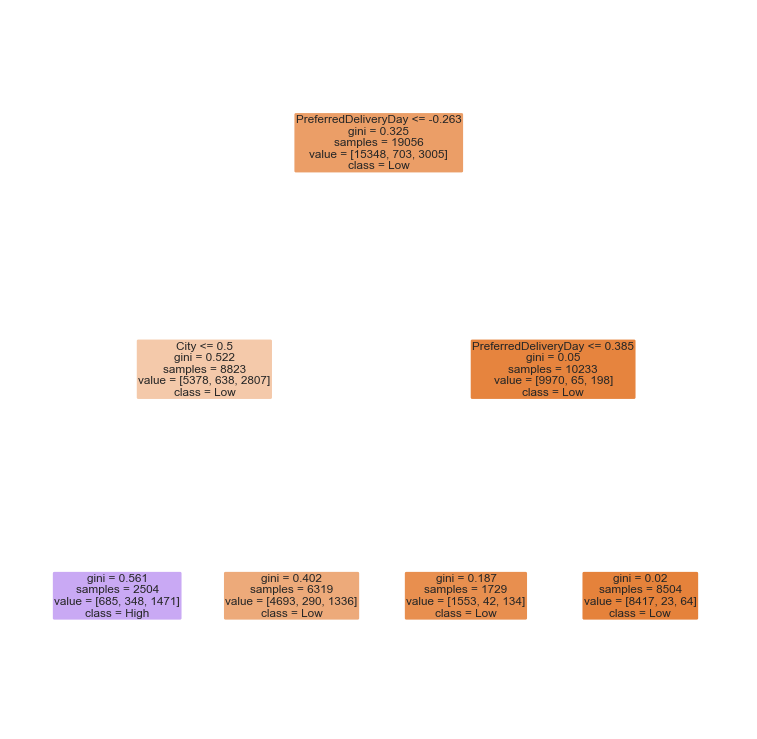

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(clf,
           feature_names =['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
                                     'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType_CustomizedEmail',
                                  'MailOpened_no', 'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes',
                                 'totalOrders', 'OrderFrequency',
                                   'numberOfDaysWithBusiness', 'makingBusiness', 'ordergap'],  
                   class_names=['Low','Medium','High'],
           filled = True,rounded = True);

### <font  color = #E1ADA2  t>**Confusion Matrix**<font>

Confusion matrix
[[3345  140  352]
 [  15  154    7]
 [ 164   19  568]]


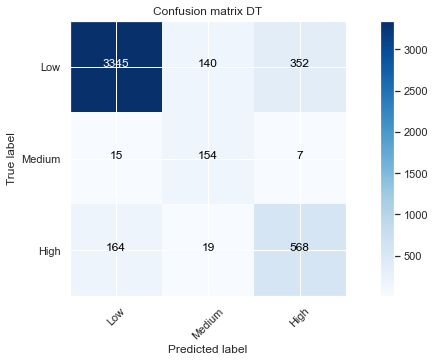

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, dt_predict_test)
np.set_printoptions(precision=2)
class_names = ['Low', 'Medium','High']
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DT')

### <font  color = #E1ADA2 >**Support Vector Classifier Tunning**<font>

In [ ]:
from sklearn.svm import SVC
svc_grid = SVC(class_weight='balanced')
param_grid = {
'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear', 'rbf']}
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 3,verbose=1)
svc_cv_grid.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 22.1min finished


GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [ ]:
svc_cv_grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=1)

In [ ]:
#predicting using best_estimator
svc_train_pred = svc_cv_grid.best_estimator_.predict(X_train)
svc_test_pred = svc_cv_grid.best_estimator_.predict(X_test)

In [ ]:
classifcation_report_train_test(y_train, svc_train_pred, y_test, svc_test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      0.82      0.89     15348
           1       0.64      1.00      0.78       703
           2       0.54      0.94      0.68      3005

    accuracy                           0.84     19056
   macro avg       0.72      0.92      0.79     19056
weighted avg       0.90      0.84      0.86     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      3837
           1       0.43      0.51      0.46       176
           2       0.47      0.81      0.60       751

    accuracy                           0.79      4764
   macro avg       0.61      0.71      0.64      4764
weighted avg       0.85      0.79      0.81      4764



### <font  color = #E1ADA2 >**Adding weights to the model to handle imbalance data**<font>

In [68]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

### <font  color = #E1ADA2 >**Passing Our target variable distribution , to get corresponding weights**<font>

In [69]:
import math

weights = {}
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight

labels_dict = {0: 0.8054156171284634, 1: 0.03689126784214945, 2: 0.15769311502938707}

weights.update(create_class_weight(labels_dict))

- #### Weights of the each class to handle Imbalance data

In [ ]:
weights

{0: 1.0, 1: 1.402660414898535, 2: 1.0}

### <font  color = #E1ADA2 >**RandomForest Hyperparameter tuning**<font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : np.arange(14)+1,
    'criterion' :['gini', 'entropy']
}
sample_weights=compute_sample_weight(weights,y_train)
grid_cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3,verbose=1,scoring='recall_weighted')
grid_cv_rfc.fit(X_train, y_train,sample_weight=sample_weights)

Fitting 3 folds for each of 224 candidates, totalling 672 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 672 out of 672 | elapsed: 12.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall_weighted', verbose=1)

In [ ]:
grid_cv_rfc.best_estimator_

RandomForestClassifier(max_depth=13, n_estimators=150, random_state=42)

In [ ]:
grid_cv_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'n_estimators': 150}

In [ ]:
rf_predict_train=grid_cv_rfc.best_estimator_.predict(X_train)
rf_predict_test=grid_cv_rfc.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, rf_predict_train, y_test, rf_predict_test)
scores = get_metrics(y_train,rf_predict_train,y_test,rf_predict_test,'RandomForest_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15348
           1       1.00      0.94      0.97       703
           2       0.84      0.74      0.79      3005

    accuracy                           0.94     19056
   macro avg       0.93      0.89      0.91     19056
weighted avg       0.93      0.94      0.93     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3837
           1       0.94      0.77      0.85       176
           2       0.72      0.62      0.67       751

    accuracy                           0.90      4764
   macro avg       0.86      0.78      0.82      4764
weighted avg       0.89      0.90      0.89      4764



### <font  color = #E1ADA2  t>**Saving Model to Pickle file**<font>

In [ ]:


Pkl_Filename = "Models/rf.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_cv_rfc.best_estimator_, file)

### <font  color = #E1ADA2  t>**XGBoost Hyperparameter Tuning**<font>

In [ ]:

import xgboost as xgb
random_state = np.random.randint(0, 1000)

parameters =    {
            'max_depth': np.arange(15)+1,
            'learning_rate': [0.01,0.05,0.1],
            'n_estimators': [50, 100, 150],
            'gamma': [0.1],
            'subsample': [0.7],
            }

xgb_model = xgb.XGBClassifier(objective='multi:softmax',random_state = random_state)
sample_weights=compute_sample_weight(weights,y_train)
grid_cv_xg = GridSearchCV(xgb_model, param_grid=parameters,scoring='recall_weighted',cv=3, verbose=1) 
grid_cv_xg.fit(X_train,y_train,sample_weight=sample_weights)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 28.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     objective='multi:softmax',
                                     random_state=689, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,


In [ ]:
grid_cv_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=689, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
grid_cv_xg.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.7}

In [ ]:
xg_predict_train=grid_cv_xg.best_estimator_.predict(X_train)
xg_predict_test=grid_cv_xg.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, xg_predict_train, y_test, xg_predict_test)
#scores = get_metrics(y_train,xg_predict_train,y_test,xg_predict_test,'XGBoost_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15348
           1       0.98      0.91      0.95       703
           2       0.76      0.71      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.89      0.86      0.88     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3837
           1       0.93      0.81      0.87       176
           2       0.72      0.68      0.70       751

    accuracy                           0.90      4764
   macro avg       0.86      0.81      0.83      4764
weighted avg       0.90      0.90      0.90      4764



### <font  color = #E1ADA2  t>**Learning Curves**<font>

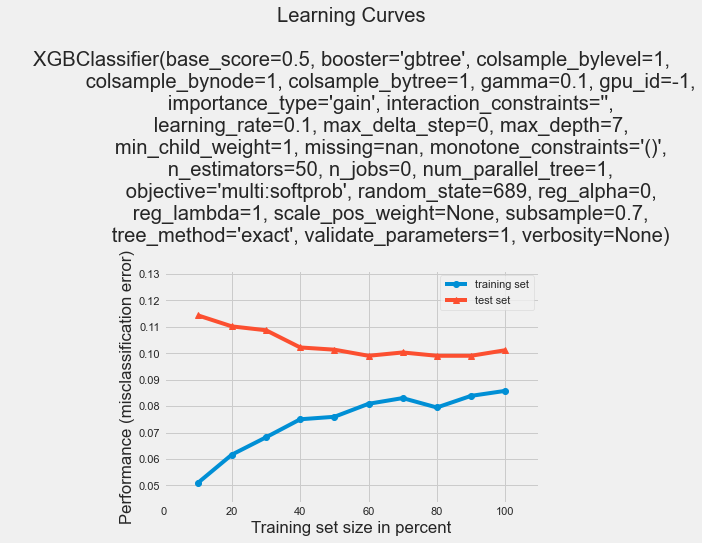

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, grid_cv_xg.best_estimator_)
plt.show()

- From the above graph ,our model has varience problem.So we need to perform some more regularization techniques.

In [ ]:
grid_cv_xg.best_estimator_.feature_importances_

array([0.01263044, 0.23529324, 0.10744328, 0.01420873, 0.01201345,
       0.23793569, 0.01539258, 0.02731727, 0.09690634, 0.01575642,
       0.03537029, 0.0437539 , 0.01762243, 0.07664521, 0.05171077],
      dtype=float32)

In [ ]:
feat_importances = pd.Series(grid_cv_xg.best_estimator_.feature_importances_, index = ['City', 'OnlineCommunication', 'AutomaticRefill',
                                     'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType_CustomizedEmail',
                                  'MailOpened_no', 'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes',
                                 'totalOrders', 'OrderFrequency',
                                   'numberOfDaysWithBusiness', 'makingBusiness', 'ordergap'])

In [ ]:
feat_importances_ordered = feat_importances.nlargest(n=10)
feat_importances_ordered

EmailType_CustomizedEmail    0.237936
OnlineCommunication          0.235293
AutomaticRefill              0.107443
MailClicked_no               0.096906
makingBusiness               0.076645
ordergap                     0.051711
OrderFrequency               0.043754
totalOrders                  0.035370
MailOpened_yes               0.027317
numberOfDaysWithBusiness     0.017622
dtype: float32

### <font  color = #E1ADA2  t>**Feature Importance with XGBoost**<font>

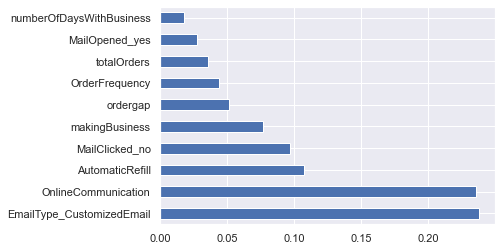

In [ ]:
## Plot Importance
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

### <font  color = #E1ADA2  t>**By Considering the Above BestEstimator ,we're tuning the two more parameters**<font>

In [ ]:
### Adding More parameters

param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}

xgb_model = grid_cv_xg.best_estimator_
sample_weights=compute_sample_weight(weights,y_train)
grid_cv_xg_1 = GridSearchCV(xgb_model, param_grid=param_test2,scoring='recall_weighted',cv=3, verbose=1) 
grid_cv_xg_1.fit(X_train,y_train,sample_weight=sample_weights)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.6min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.1, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=50, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=689, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=None,
                                     subsample=0.7, tree_method='exact',
    

In [ ]:
grid_cv_xg_1.best_params_


{'reg_alpha': 1e-05, 'reg_lambda': 1}

In [ ]:
grid_cv_xg_1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=689, reg_alpha=1e-05,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xg_predict_train_1=grid_cv_xg_1.best_estimator_.predict(X_train)
xg_predict_test_1=grid_cv_xg_1.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, xg_predict_train_1, y_test, xg_predict_test_1)
scores = get_metrics(y_train,xg_predict_train_1,y_test,xg_predict_test_1,'XGBoost_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15348
           1       0.98      0.91      0.95       703
           2       0.76      0.71      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.89      0.86      0.88     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3837
           1       0.93      0.81      0.87       176
           2       0.72      0.68      0.70       751

    accuracy                           0.90      4764
   macro avg       0.86      0.81      0.83      4764
weighted avg       0.90      0.90      0.90      4764



### <font  color = #E1ADA2  t>**Confusion Mtarix**<font>

Confusion matrix
[[3634    6  197]
 [  28  143    5]
 [ 238    4  509]]


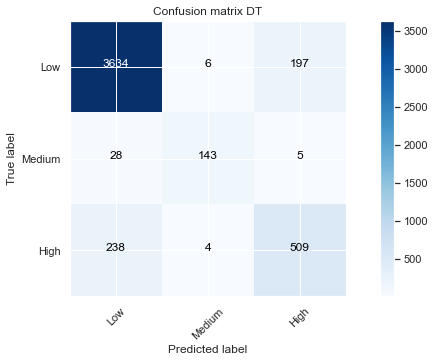

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, xg_predict_test_1)
np.set_printoptions(precision=2)
class_names = ['Low', 'Medium','High']
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DT')

In [ ]:
Pkl_Filename = "Models/xg.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_cv_xg_1.best_estimator_, file)

### <font  color = #E1ADA2  t>**LightGBM Hyperparamter Tuning**<font>

In [ ]:
import lightgbm as lgb

parms = {  
                'max_depth':np.arange(15)+1,
                'n_estimators':[30,50,70,100,150],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.7]
                
                 
}
clf = lgb.LGBMClassifier()
CV_lgbm = GridSearchCV(estimator = clf,param_grid = parms,cv=3,verbose=1,scoring='recall_weighted')
CV_lgbm.fit(X_train,y_train,sample_weight=sample_weights)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  7.4min finished


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': [30, 50, 70, 100, 150],
                         'subsample': [0.7]},
             scoring='recall_weighted', verbose=1)

In [ ]:
CV_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 70, 'subsample': 0.7}

In [ ]:
CV_lgbm.best_estimator_

LGBMClassifier(max_depth=8, n_estimators=70, subsample=0.7)

In [ ]:
lg_predict_train_1=CV_lgbm.best_estimator_.predict(X_train)
lg_predict_test_1=CV_lgbm.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, lg_predict_train_1, y_test, lg_predict_test_1)
#scores = get_metrics(y_train,lg_predict_train_1,y_test,lg_predict_test_1,'LGBM_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15348
           1       0.99      0.93      0.96       703
           2       0.75      0.73      0.74      3005

    accuracy                           0.92     19056
   macro avg       0.89      0.87      0.88     19056
weighted avg       0.92      0.92      0.92     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3837
           1       0.93      0.81      0.86       176
           2       0.71      0.68      0.69       751

    accuracy                           0.90      4764
   macro avg       0.86      0.81      0.83      4764
weighted avg       0.90      0.90      0.90      4764



### <font  color = #E1ADA2  t>**By Considering the Above BestEstimator ,we're tuning the two more parameters**<font>

In [ ]:
params = {
             'reg_alpha': [0, 1e-1, 1, 2],
             'reg_lambda': [0, 1e-1, 1, 5],
              'objective': ['multiclass'],
              'num_class':[3]
}
                
                
clf_1 = CV_lgbm.best_estimator_
CV_lgbm_1 = GridSearchCV(estimator = clf_1,param_grid = params,cv=3,verbose=1,scoring='recall_weighted')
CV_lgbm_1.fit(X_train,y_train,sample_weight=sample_weights)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   21.0s finished


GridSearchCV(cv=3,
             estimator=LGBMClassifier(max_depth=8, n_estimators=50,
                                      subsample=0.7),
             param_grid={'num_class': [3], 'objective': ['multiclass'],
                         'reg_alpha': [0, 0.1, 1, 2],
                         'reg_lambda': [0, 0.1, 1, 5]},
             scoring='recall_weighted', verbose=1)

In [ ]:
CV_lgbm_1.best_estimator_

LGBMClassifier(max_depth=8, n_estimators=50, num_class=3,
               objective='multiclass', reg_alpha=0, reg_lambda=0,
               subsample=0.7)

In [ ]:
lg_predict_train_1=CV_lgbm_1.best_estimator_.predict(X_train)
lg_predict_test_1=CV_lgbm_1.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, lg_predict_train_1, y_test, lg_predict_test_1)
#scores = get_metrics(y_train,lg_predict_train_1,y_test,lg_predict_test_1,'LGBM_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15348
           1       0.96      0.90      0.93       703
           2       0.74      0.72      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.88      0.86      0.87     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3837
           1       0.92      0.80      0.86       176
           2       0.71      0.68      0.69       751

    accuracy                           0.90      4764
   macro avg       0.85      0.81      0.83      4764
weighted avg       0.90      0.90      0.90      4764



### <font  color = #E1ADA2  t>**Stacking the MultipleModels Using GridSearchCV Method**<font>

In [ ]:
from mlxtend.classifier import StackingClassifier


clf1 = grid_cv_dt.best_estimator_
clf2 = grid_cv_xg.best_estimator_
clf3 = grid_cv_xg_1.best_estimator_
lgbm = CV_lgbm_1.best_estimator_
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lgbm)

params = {'decisiontreeclassifier__max_depth': [8],
          'meta_classifier__learning_rate': [0.1],
          'meta_classifier__max_depth': [8],
          'meta_classifier__n_estimators': [50],
          }

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=10,
                    scoring='recall_weighted',verbose=1)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.4s finished


0.901 +/- 0.00 {'decisiontreeclassifier__max_depth': 8, 'meta_classifier__learning_rate': 0.1, 'meta_classifier__max_depth': 8, 'meta_classifier__n_estimators': 50}
Best parameters: {'decisiontreeclassifier__max_depth': 8, 'meta_classifier__learning_rate': 0.1, 'meta_classifier__max_depth': 8, 'meta_classifier__n_estimators': 50}
Accuracy: 0.90


In [ ]:
grid.best_estimator_

StackingClassifier(classifiers=[DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=8,
                                                       random_state=88),
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0.1,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=7,
                                              m...
                                              monotone_constraint

In [ ]:
grid.best_params_

{'decisiontreeclassifier__max_depth': 8,
 'meta_classifier__learning_rate': 0.1,
 'meta_classifier__max_depth': 8,
 'meta_classifier__n_estimators': 50}

In [ ]:
stack_predict_train_1=grid.best_estimator_.predict(X_train)
stack_predict_test_1=grid.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, stack_predict_train_1, y_test, stack_predict_test_1)
scores = get_metrics(y_train,stack_predict_train_1,y_test,stack_predict_test_1,'Stacked_GridSearchCV',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15348
           1       0.99      0.90      0.94       703
           2       0.75      0.71      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.89      0.85      0.87     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3837
           1       0.96      0.77      0.85       176
           2       0.71      0.68      0.70       751

    accuracy                           0.90      4764
   macro avg       0.87      0.80      0.83      4764
weighted avg       0.90      0.90      0.90      4764



### <font  color = #E1ADA2  t>**Final Models With their Corresponding Accuracy,Precision,Recall**<font>

In [ ]:
scores

Model  Train_Accuracy  Test_Accuracy  \
0       Logistic_GridSearchCV        0.855111       0.852225   
1  DecisionTrees_GridSearchCV        0.860674       0.853694   
2   RandomForest_GridSearchCV        0.935558       0.895676   
3        XGBoost_GridSearchCV        0.914935       0.899664   
4           LGBM_GridSearchCV        0.912364       0.897355   
5        Stacked_GridSearchCV        0.981056       0.876364   

   Train_Recall_macro  Test_Recall_macro  Train_Precision_macro  \
0            0.587702           0.587299               0.587702   
1            0.871124           0.834367               0.871124   
2            0.885274           0.783516               0.885274   
3            0.859948           0.812452               0.859948   
4            0.857501           0.807883               0.857501   
5            0.986807           0.778737               0.986807   

   Test_Precision_macro  
0              0.587299  
1              0.834367  
2              0.783516  
3              0.812452  
4              0.807883  
5              0.778737

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.utils import to_categorical

nclasses = len(np.unique(y_train))
nfeatures = np.size(X_train, axis=1)

target_labels_keras = to_categorical(y_train)
label = y_test.copy()
label = to_categorical(label)


# keras model
model = Sequential()
model.add(Dense(nfeatures, activation='relu', kernel_initializer='he_normal', input_shape=(nfeatures,)))
model.add(Dense(150, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(nclasses, activation='softmax', kernel_initializer='he_normal'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit model
model.fit(X_train, target_labels_keras, batch_size=24,
                shuffle=True,
                validation_data=(X_test, label), epochs=30,class_weight=weights)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/30
794/794 [==============================] - 7s 5ms/step - loss: 0.5695 - accuracy: 0.7859 - val_loss: 0.4086 - val_accuracy: 0.8438
Epoch 2/30
794/794 [==============================] - 3s 4ms/step - loss: 0.4182 - accuracy: 0.8443 - val_loss: 0.3593 - val_accuracy: 0.8564
Epoch 3/30
794/794 [==============================] - 3s 4ms/step - loss: 0.3889 - accuracy: 0.8527 - val_loss: 0.3438 - val_accuracy: 0.8602
Epoch 4/30
794/794 [==============================] - 3s 4ms/step - loss: 0.3686 - accuracy: 0.8599 - val_loss: 0.3446 - val_accuracy: 0.8634
Epoch 5/30
794/794 [==============================] - 3s 4ms/step - loss: 0.3608 - accuracy: 0.8607 - val_loss: 0.3258 - val_accuracy: 0.8680
Epoch 6/30
794/794 [==============================] - 3s 4ms/step - loss: 0.3526 - accuracy: 0.8653 - val_loss: 0.3298 - val_accuracy: 0.8631
Epoch 7/30

In [72]:
y_pred_train = model.predict(X_train)
y_pred_train = np.flip(np.argsort(y_pred_train), axis=1)[:, :5]
y_pred_train = np.argmax(y_pred_train, axis=-1)


y_pred_test = model.predict(X_test)
y_pred_test = np.flip(np.argsort(y_pred_test), axis=1)[:, :5]
y_pred_test = np.argmax(y_pred_test, axis=-1)



Confusion matrix
[[ 173 2647 1017]
 [  12  131   33]
 [ 373  374    4]]


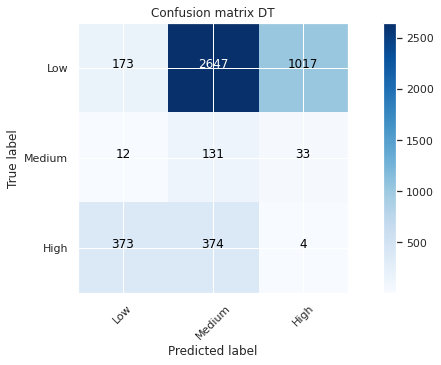

In [75]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)
class_names = ['Low', 'Medium','High']
plt.figure(figsize=(10,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DT')

### <font  color = #E1ADA2  t>**Handling outliers by apply quantile transformation**<font>
- Data having the Outliers in the numerical columns.
- If we remove the outliers the data become less sufficient to train the ML model.
- With the help of QTransformation We Handle this Outliers.

In [ ]:
df_trans = final_data.drop('CustomerID',axis=1)

In [ ]:
df_trans.head()

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0  CITY2                    0                0                 0   
1  CITY2                    1                1                 1   
2  CITY2                    0                0                 0   
3  CITY4                    0                0                 0   
4  CITY2                    1                1                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0               Monday                       29.0            0.0   
1               Friday                       95.0            7.0   
2            Wednesday                        0.0            0.0   
3               Monday                       30.0            3.0   
4               Friday                       64.0           46.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0            30.0            28.0              1.0           15   
1            89.0            85.0             10.0        15614   
2             1.0             0.0              0.0          443   
3            28.0            26.0              4.0          748   
4            19.0            54.0             10.0         2350   

   OrderFrequency RetentionPotential  numberOfDaysWithBusiness  \
0               1               High                       300   
1             186                Low                      1096   
2              13             Medium                         0   
3               7                Low                       751   
4              34                Low                      1504   

   makingBusiness  ordergap  
0               0      1624  
1            1024      1463  
2             217      2391  
3             791      1819  
4             848      1466

### <font  color = #E1ADA2  t>**Applying QuantileTransformation**<font>
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()   ## default yeo_jhonson

In [ ]:
df_trans['RetentionPotential'] = df_trans['RetentionPotential'].map(dict(High=2, Low=0,Medium=1))

### <font  color = #E1ADA2  t>**LabelEncoding**<font>


In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_cols =['City', 'PreferredDeliveryDay']
for col in cat_cols:
    le.fit(df_trans[col])
    df_trans[col] = le.fit_transform(df_trans[col])

 
- <font  color = #E1ADA2  t>**Splitting the data**<font>

In [ ]:

y_scale = df_trans['RetentionPotential']
X_scale = df_trans.loc[:, df_trans.columns != 'RetentionPotential']

X_train_trans, X_test_trans, y_train_trans, y_test_trans =   train_test_split(X_scale, y_scale, test_size=0.20, random_state=111,stratify = y)

print(X_train_trans.shape, X_test_trans.shape)

(19056, 15) (4764, 15)


In [ ]:
num_cols = ["EmailType_CustomizedEmail", 'MailOpened_no', 'MailOpened_yes','MailClicked_no','MailClicked_yes','totalOrders','OrderFrequency','numberOfDaysWithBusiness','makingBusiness','ordergap']
X_train_trans[num_cols] = qt.fit_transform(X_train_trans[num_cols])
X_test_trans[num_cols] = qt.fit_transform(X_test_trans[num_cols])

In [ ]:
X_train_trans.head()

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
18593     3                    1                1                 0   
10133     3                    1                0                 0   
14474     2                    1                0                 0   
13892     3                    1                0                 0   
4973      3                    0                0                 0   

       PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
18593                     4                  -5.199338      -5.199338   
10133                     5                  -5.199338      -5.199338   
14474                     4                  -0.103057       0.086674   
13892                     0                  -5.199338      -5.199338   
4973                      5                  -5.199338      -5.199338   

       MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
18593       -5.199338       -5.199338        -5.199338    -0.728240   
10133       -5.199338       -5.199338        -5.199338    -0.728240   
14474        0.175278       -0.094232         0.519225    -1.107059   
13892       -5.199338       -5.199338        -5.199338    -0.728240   
4973        -5.199338       -5.199338        -5.199338     0.408805   

       OrderFrequency  numberOfDaysWithBusiness  makingBusiness  ordergap  
18593       -0.482248                 -5.199338       -5.199338 -0.613509  
10133       -0.482248                 -5.199338       -5.199338  0.457033  
14474       -0.482248                 -0.132113       -5.199338  0.031369  
13892       -0.482248                 -5.199338       -5.199338  0.111890  
4973        -0.482248                 -5.199338       -5.199338  1.141775


- <font  color = #E1ADA2  t>**After applying the Quantiletransformation checking the distribution of data**<font>


Plot for EMAILTYPE_CUSTOMIZEDEMAIL: total counts = 19056


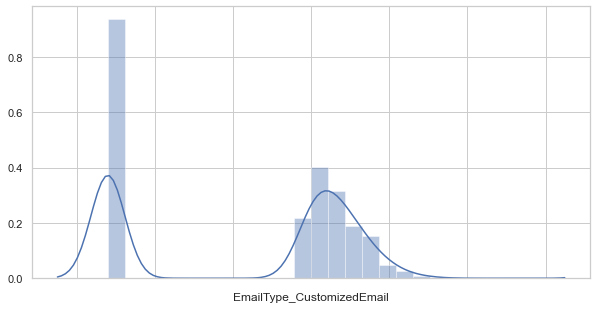

Plot for MAILOPENED_NO: total counts = 19056


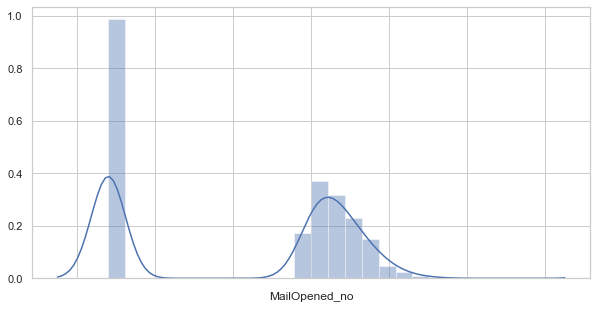

Plot for MAILOPENED_YES: total counts = 19056


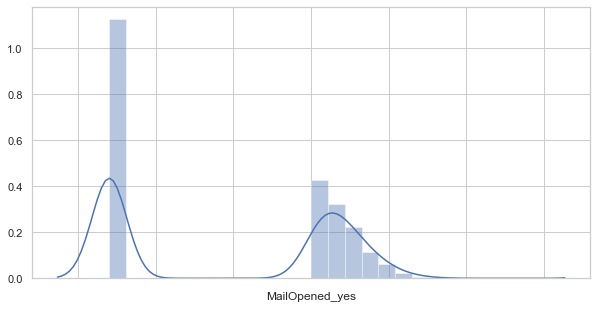

Plot for MAILCLICKED_NO: total counts = 19056


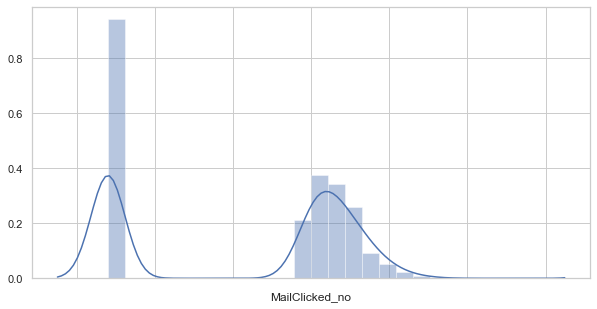

Plot for MAILCLICKED_YES: total counts = 19056


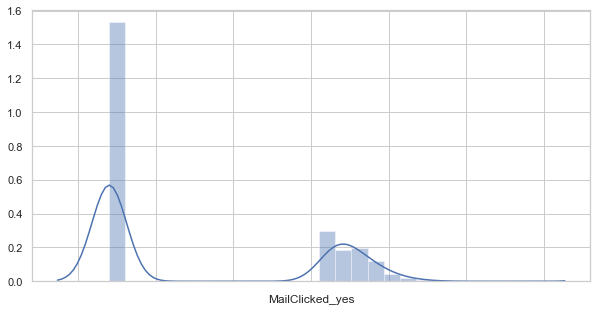

Plot for TOTALORDERS: total counts = 19056


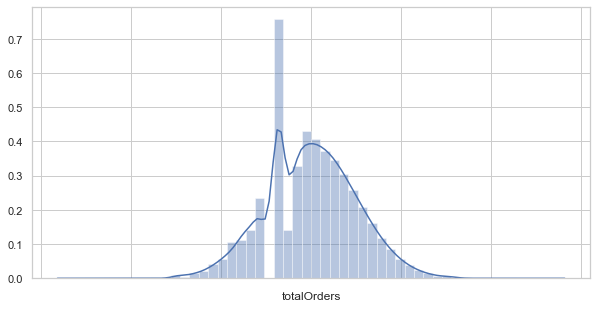

Plot for ORDERFREQUENCY: total counts = 19056


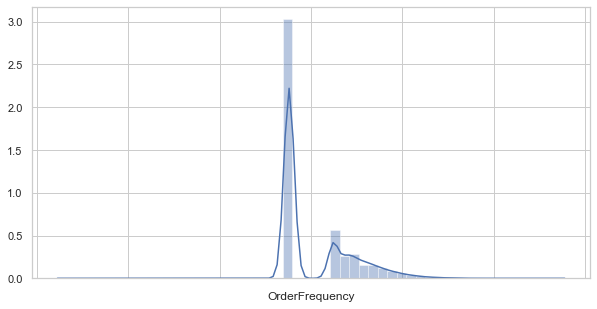

Plot for NUMBEROFDAYSWITHBUSINESS: total counts = 19056


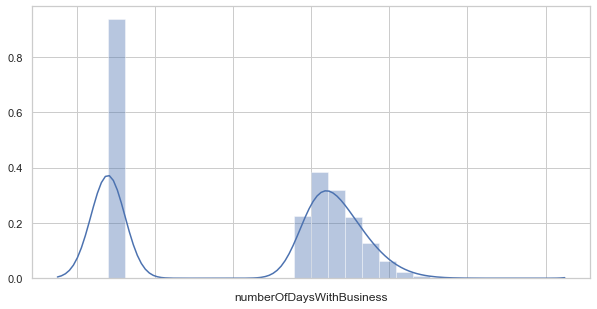

Plot for MAKINGBUSINESS: total counts = 19056


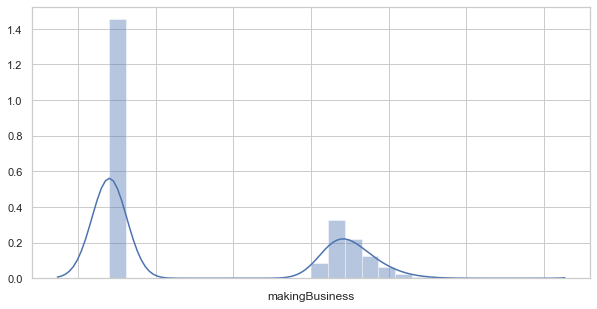

Plot for ORDERGAP: total counts = 19056


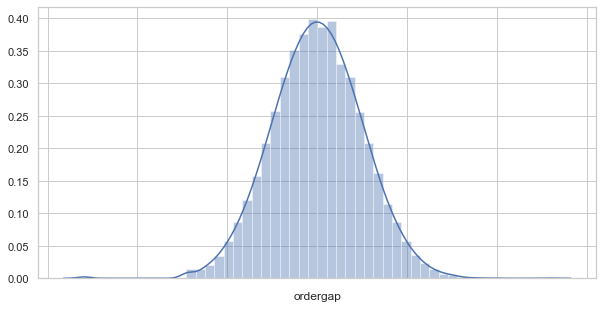

In [ ]:
sns.set(style="whitegrid")

df_explore = X_train_trans[num_cols]
for cat in df_explore:
    cat_num = df_explore[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()


- <font  color = #E1ADA2  t>**Checking with BoxPlots If Outliers Exist or Not**<font>


City                            AxesSubplot(0.125,0.536818;0.0824468x0.343182)
OnlineCommunication          AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
AutomaticRefill              AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
DoorstepDelivery             AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
PreferredDeliveryDay         AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
EmailType_CustomizedEmail    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
MailOpened_no                AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
MailOpened_yes               AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
MailClicked_no                     AxesSubplot(0.125,0.125;0.0824468x0.343182)
MailClicked_yes                 AxesSubplot(0.223936,0.125;0.0824468x0.343182)
totalOrders                     AxesSubplot(0.322872,0.125;0.0824468x0.343182)
OrderFrequency                  AxesSubplot(0.421809,0.125;0.0824468x0.343182)
numberOfDaysWithBusiness        AxesSubplot(0.520745

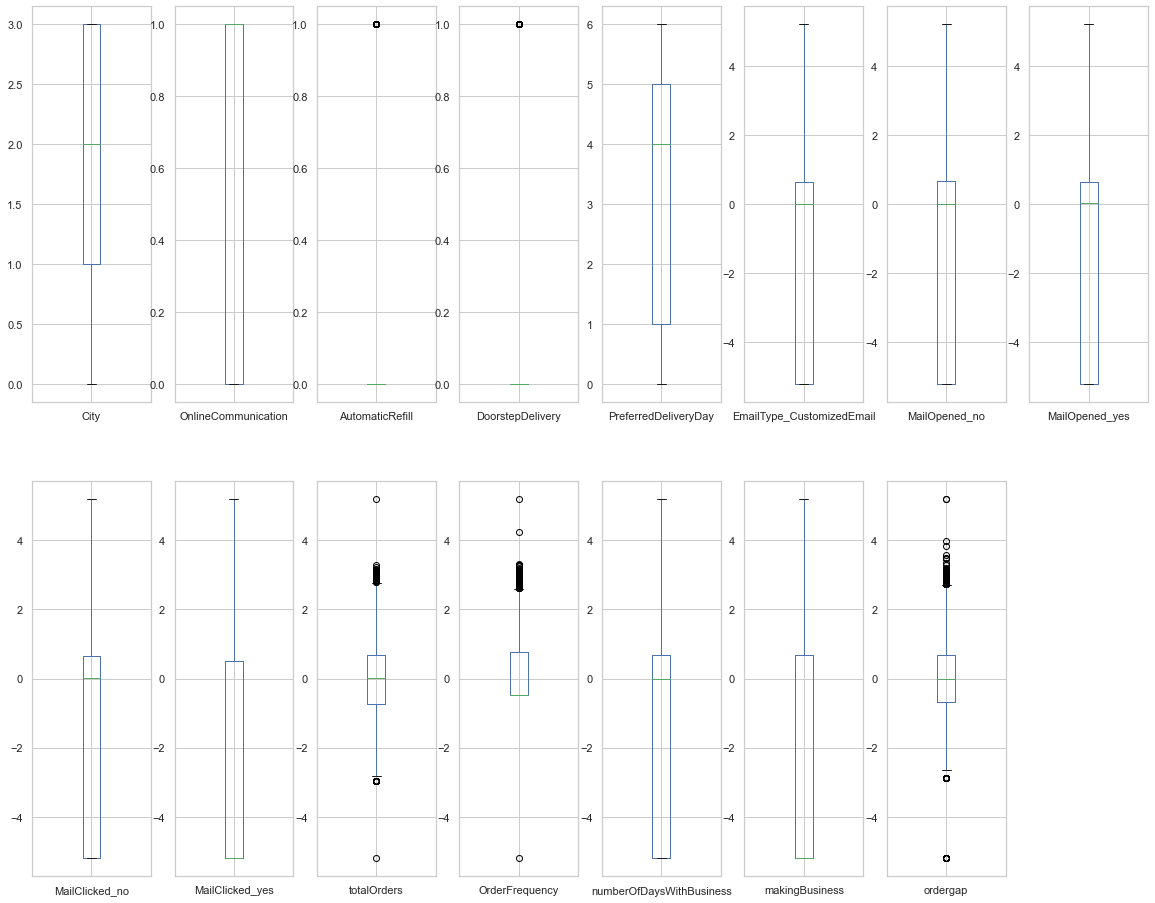

In [ ]:
X_train_trans.plot(kind='box',layout=(2,8),subplots=1,figsize=(20,16))

- As we observe from the above visualizations has less no of Outliers compare to previoues box plots


- <font  color = #E1ADA2  t>**Pipeline to run basic algorithms**<font>


In [ ]:
results_base_trans = []
for m in models:    
    print(m['name'])    
    results_base_trans.append(model_selection(m['classifier'], 
                                   m['name'],
                                   X_train_trans, 
                                   y_train_trans,X_test_trans,y_test_trans
                                  ))
    print('completed')

logreg
completed
knn
completed
dsc
completed
rf
completed
svc
completed
Boosting
[16:07:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


completed


- <font  color = #E1ADA2  t>**Results Of BaseModels**<font>

In [ ]:
results_base_models_trans = pd.DataFrame(results_base_trans).sort_values(by='Valid_Accuracy', ascending = False)
results_base_models_trans

classifier_name  Train_Accuracy  Valid_Accuracy
5        Boosting        0.943168        0.889379
3              rf        0.984309        0.876574
1             knn        0.906119        0.868388
2             dsc        0.984309        0.856633
4             svc        0.690071        0.849076
0          logreg        0.855321        0.473762

### <font  color = #E1ADA2  t>**Hyperparamter tuning LGBM On Transformed Data**<font>

In [ ]:
parms = {  
                'max_depth':np.arange(15)+1,
                'n_estimators':[50,100,150,200],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.7] 
}
clf = lgb.LGBMClassifier()
CV_lgbm_trans = GridSearchCV(estimator = clf,param_grid = parms,cv=3,verbose=1,scoring='recall_weighted')
CV_lgbm_trans.fit(X_train_trans,y_train_trans,sample_weight=sample_weights)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 13.7min finished


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.7]},
             scoring='recall_weighted', verbose=1)

In [ ]:
CV_lgbm_trans.best_params_


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.7}

In [ ]:
lg_predict_train_trans=CV_lgbm_trans.best_estimator_.predict(X_train_trans)
lg_predict_test_trans=CV_lgbm_trans.best_estimator_.predict(X_test_trans)
classifcation_report_train_test(y_train, lg_predict_train_trans, y_test, lg_predict_test_trans)
scores = get_metrics(y_train,lg_predict_train_trans,y_test,lg_predict_test_trans,'LGBM_GridSearchCV_QTransformation_applied',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15348
           1       0.97      0.91      0.94       703
           2       0.74      0.72      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.88      0.86      0.87     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3837
           1       0.93      0.77      0.84       176
           2       0.71      0.66      0.68       751

    accuracy                           0.90      4764
   macro avg       0.86      0.79      0.82      4764
weighted avg       0.89      0.90      0.89      4764



### <font  color = #E1ADA2  t>**Hyperparamter tuning XGBoost On Transformed Data**<font>

In [ ]:
parameters =    {
            'max_depth': np.arange(15)+1,
            'learning_rate': [0.01,0.05,0.1],
            'n_estimators': [50, 100, 150],
            'gamma': [0.1],
            'subsample': [0.7],
            }

xgb_model = xgb.XGBClassifier(objective='multi:softmax',random_state = random_state)
grid_cv_xg_trans = GridSearchCV(xgb_model, param_grid=parameters,scoring='recall_weighted',cv=3, verbose=1) 
grid_cv_xg_trans.fit(X_train_trans,y_train_trans,sample_weight=sample_weights)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 34.5min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     objective='multi:softmax',
                                     random_state=689, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,


In [ ]:
grid_cv_xg_trans.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.7}

In [ ]:
xg_predict_train_trans=grid_cv_xg_trans.best_estimator_.predict(X_train_trans)
xg_predict_test_trans=grid_cv_xg_trans.best_estimator_.predict(X_test_trans)
classifcation_report_train_test(y_train, xg_predict_train_trans, y_test, xg_predict_test_trans)
#scores = get_metrics(y_train,lg_predict_train_trans,y_test,lg_predict_test_trans,'LGBM_GridSearchCV_QTransformation_applied',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15348
           1       0.98      0.91      0.95       703
           2       0.76      0.71      0.73      3005

    accuracy                           0.91     19056
   macro avg       0.89      0.86      0.88     19056
weighted avg       0.91      0.91      0.91     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3837
           1       0.94      0.78      0.85       176
           2       0.72      0.64      0.68       751

    accuracy                           0.90      4764
   macro avg       0.86      0.79      0.82      4764
weighted avg       0.89      0.90      0.89      4764



In [ ]:
grid_cv_xg_trans.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=689, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

### <font  color = #E1ADA2  t>**Trail-2 Hyperparamter tuning XGBoost On Transformed Data**<font>

In [ ]:
param_test2 = {
    'n_estimators': [130,150,200],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
 }
xgb = grid_cv_xg_trans.best_estimator_
grid_cv_xg_trans = GridSearchCV(xgb, param_grid=param_test2,scoring='recall_weighted',cv=3, verbose=1) 
grid_cv_xg_trans.fit(X_train_trans,y_train_trans,sample_weight=sample_weights)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 31.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.1, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=50, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=689, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=None,
                                     subsample=0.7, tree_method='exact',
    

In [ ]:
xg_predict_train_trans=grid_cv_xg_trans.best_estimator_.predict(X_train_trans)
xg_predict_test_trans=grid_cv_xg_trans.best_estimator_.predict(X_test_trans)
classifcation_report_train_test(y_train, xg_predict_train_trans, y_test, xg_predict_test_trans)
scores = get_metrics(y_train,xg_predict_train_trans,y_test,xg_predict_test_trans,'XGBoost_GridSearchCV_QTransformation_applied',scores)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15348
           1       1.00      0.95      0.97       703
           2       0.83      0.76      0.79      3005

    accuracy                           0.94     19056
   macro avg       0.93      0.89      0.91     19056
weighted avg       0.93      0.94      0.93     19056


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3837
           1       0.94      0.77      0.85       176
           2       0.72      0.64      0.68       751

    accuracy                           0.90      4764
   macro avg       0.86      0.79      0.82      4764
weighted avg       0.89      0.90      0.89      4764



 
### <font  color = #E1ADA2  t>**Final Scores of algorithms**<font>

In [ ]:
scores

Model  Train_Accuracy  \
0                         Logistic_GridSearchCV        0.855111   
1                    DecisionTrees_GridSearchCV        0.860674   
2                     RandomForest_GridSearchCV        0.935558   
3                          XGBoost_GridSearchCV        0.914935   
4                             LGBM_GridSearchCV        0.912364   
5                          Stacked_GridSearchCV        0.981056   
6     LGBM_GridSearchCV_QTransformation_applied        0.912259   
7  XGBoost_GridSearchCV_QTransformation_applied        0.935821   

   Test_Accuracy  Train_Recall_macro  Test_Recall_macro  \
0       0.852225            0.587702           0.587299   
1       0.853694            0.871124           0.834367   
2       0.895676            0.885274           0.783516   
3       0.899664            0.859948           0.812452   
4       0.897355            0.857501           0.807883   
5       0.876364            0.986807           0.778737   
6       0.896306            0.860886           0.790894   
7       0.895676            0.894093           0.787443   

   Train_Precision_macro  Test_Precision_macro  
0               0.587702              0.587299  
1               0.871124              0.834367  
2               0.885274              0.783516  
3               0.859948              0.812452  
4               0.857501              0.807883  
5               0.986807              0.778737  
6               0.860886              0.790894  
7               0.894093              0.787443

## <font  color = #E1ADA2  t>**Test Preprocessing**<font>

In [ ]:
customer_data_test = pd.read_excel('TestData/Customerdata_Test.xlsx')
email_data_test = pd.read_excel('TestData/Emaildata_Test.xlsx')
train_data_test = pd.read_excel('TestData/Test.xlsx')
transactions_data_test = pd.read_excel('TestData/transactionsdata_Test.xlsx')

In [ ]:
c_data_test = customer_data_test.copy()
e_data_test = email_data_test.copy()
t_data_test = train_data_test.copy()
trans_data_test = transactions_data_test.copy()

In [ ]:
e_data_test = pd.get_dummies(data=e_data_test, columns=['EmailType', 'MailOpened','MailClicked'])


In [ ]:
e_data_test = e_data_test.groupby('CustomerID').sum()
email_data_test["DateOfemail"] =pd.to_datetime(email_data_test["DateOfemail"])


In [ ]:
email_data_test = email_data_test.groupby('CustomerID').agg(welcomeEmailDate=('DateOfemail', np.min), RecentInteraction=('DateOfemail', np.max))


In [ ]:
email_test = e_data_test.merge(email_data_test, how='inner', on='CustomerID')
email_test.head()

EmailType_CustomizedEmail  EmailType_WelcomeEmail  MailOpened_no  \
CustomerID                                                                     
C12121                           24.0                     1.0           16.0   
C12132                            0.0                     1.0            0.0   
C12134                            0.0                     1.0            0.0   
C12135                           29.0                     1.0           21.0   
C12136                           41.0                     1.0           38.0   

            MailOpened_yes  MailClicked_NotApplicable  MailClicked_no  \
CustomerID                                                              
C12121                 9.0                        1.0            21.0   
C12132                 1.0                        1.0             0.0   
C12134                 1.0                        1.0             0.0   
C12135                 9.0                        1.0            24.0   
C12136                 4.0                        1.0            40.0   

            MailClicked_yes welcomeEmailDate RecentInteraction  
CustomerID                                                      
C12121                  3.0       2017-12-04        2017-12-13  
C12132                  0.0       2013-10-20        2013-10-20  
C12134                  0.0       2013-09-18        2013-09-18  
C12135                  5.0       2017-11-01        2018-01-10  
C12136                  1.0       2013-09-28        2013-10-19

In [ ]:
trans_order_test = trans_data_test.groupby('CustomerID').agg(totalOrders=('OrderQuantity', np.sum),OrderFrequency = ('OrderQuantity',np.count_nonzero ))
trans_date_test = trans_data_test.groupby('CustomerID').agg(firstOrder=('DateOfOrder', np.min), lastOrder=('DateOfOrder', np.max))
transactions_test = trans_order_test.merge(trans_date_test, on = 'CustomerID', how= 'inner')
transactions_test.head()

totalOrders  OrderFrequency  firstOrder   lastOrder
CustomerID                                                     
C12121               52               1  2017-12-14  2017-12-14
C12132               40               1  2013-10-20  2013-10-20
C12134               40               1  2013-09-18  2013-09-18
C12135               41               1  2018-01-10  2018-01-10
C12136               79               1  2013-10-19  2013-10-19

In [ ]:
data_test = email_test.merge(transactions_test, on = 'CustomerID' , how=  'inner')
data_test.head()

EmailType_CustomizedEmail  EmailType_WelcomeEmail  MailOpened_no  \
CustomerID                                                                     
C12121                           24.0                     1.0           16.0   
C12132                            0.0                     1.0            0.0   
C12134                            0.0                     1.0            0.0   
C12135                           29.0                     1.0           21.0   
C12136                           41.0                     1.0           38.0   

            MailOpened_yes  MailClicked_NotApplicable  MailClicked_no  \
CustomerID                                                              
C12121                 9.0                        1.0            21.0   
C12132                 1.0                        1.0             0.0   
C12134                 1.0                        1.0             0.0   
C12135                 9.0                        1.0            24.0   
C12136                 4.0                        1.0            40.0   

            MailClicked_yes welcomeEmailDate RecentInteraction  totalOrders  \
CustomerID                                                                    
C12121                  3.0       2017-12-04        2017-12-13           52   
C12132                  0.0       2013-10-20        2013-10-20           40   
C12134                  0.0       2013-09-18        2013-09-18           40   
C12135                  5.0       2017-11-01        2018-01-10           41   
C12136                  1.0       2013-09-28        2013-10-19           79   

            OrderFrequency  firstOrder   lastOrder  
CustomerID                                          
C12121                   1  2017-12-14  2017-12-14  
C12132                   1  2013-10-20  2013-10-20  
C12134                   1  2013-09-18  2013-09-18  
C12135                   1  2018-01-10  2018-01-10  
C12136                   1  2013-10-19  2013-10-19

In [ ]:
data_test = customer_data_test.merge(data_test, on = 'CustomerID' , how=  'inner')
data_test.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C17838  CITY4         2010-10-22                    0                0   
1     C12403  CITY2         2008-11-17                    1                1   
2     C19041  CITY4         2011-01-24                    0                1   
3     C24069  CITY2         2010-09-18                    0                0   
4     C26718  CITY2         2010-10-02                    1                0   

   DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
0                 0             Thursday                        0.0   
1                 0            Wednesday                       46.0   
2                 0               Friday                       60.0   
3                 0            Wednesday                       45.0   
4                 0               Monday                       13.0   

   EmailType_WelcomeEmail  MailOpened_no  MailOpened_yes  \
0                     1.0            0.0             1.0   
1                     1.0            9.0            38.0   
2                     1.0           34.0            27.0   
3                     1.0           45.0             1.0   
4                     1.0            5.0             9.0   

   MailClicked_NotApplicable  MailClicked_no  MailClicked_yes  \
0                        1.0             0.0              0.0   
1                        1.0            39.0              7.0   
2                        1.0            56.0              4.0   
3                        1.0            45.0              0.0   
4                        1.0            11.0              2.0   

  welcomeEmailDate RecentInteraction  totalOrders  OrderFrequency  firstOrder  \
0       2010-10-22        2010-10-22           55               1  2011-03-28   
1       2008-11-17        2013-12-29        29537             168  2010-10-12   
2       2011-01-24        2013-12-31        14321             122  2011-05-16   
3       2010-09-18        2010-11-08           47               1  2010-11-09   
4       2010-10-02        2014-01-12        20238             129  2011-01-25   

    lastOrder  
0  2011-03-28  
1  2014-01-14  
2  2014-01-16  
3  2010-11-09  
4  2014-01-12

In [ ]:
final_data_test = data_test.merge(train_data_test,  on = 'CustomerID' , how=  'inner')
final_data_test.head()

CustomerID   City DateOfRegistration  OnlineCommunication  AutomaticRefill  \
0     C17838  CITY4         2010-10-22                    0                0   
1     C12403  CITY2         2008-11-17                    1                1   
2     C19041  CITY4         2011-01-24                    0                1   
3     C24069  CITY2         2010-09-18                    0                0   
4     C26718  CITY2         2010-10-02                    1                0   

   DoorstepDelivery PreferredDeliveryDay  EmailType_CustomizedEmail  \
0                 0             Thursday                        0.0   
1                 0            Wednesday                       46.0   
2                 0               Friday                       60.0   
3                 0            Wednesday                       45.0   
4                 0               Monday                       13.0   

   EmailType_WelcomeEmail  MailOpened_no  MailOpened_yes  \
0                     1.0            0.0             1.0   
1                     1.0            9.0            38.0   
2                     1.0           34.0            27.0   
3                     1.0           45.0             1.0   
4                     1.0            5.0             9.0   

   MailClicked_NotApplicable  MailClicked_no  MailClicked_yes  \
0                        1.0             0.0              0.0   
1                        1.0            39.0              7.0   
2                        1.0            56.0              4.0   
3                        1.0            45.0              0.0   
4                        1.0            11.0              2.0   

  welcomeEmailDate RecentInteraction  totalOrders  OrderFrequency  firstOrder  \
0       2010-10-22        2010-10-22           55               1  2011-03-28   
1       2008-11-17        2013-12-29        29537             168  2010-10-12   
2       2011-01-24        2013-12-31        14321             122  2011-05-16   
3       2010-09-18        2010-11-08           47               1  2010-11-09   
4       2010-10-02        2014-01-12        20238             129  2011-01-25   

    lastOrder  
0  2011-03-28  
1  2014-01-14  
2  2014-01-16  
3  2010-11-09  
4  2014-01-12

In [ ]:
final_data_test['numberOfDaysWithBusiness'] =   final_data_test['RecentInteraction']-final_data_test['DateOfRegistration']


In [ ]:
final_data_test['makingBusiness'] = pd.to_datetime(final_data_test['lastOrder'])- pd.to_datetime(final_data_test['firstOrder'])
final_data_test['ordergap'] = pd.to_datetime(final_data_test['lastOrder']).max() -  pd.to_datetime(final_data_test['lastOrder'])


final_data_test['ordergap'] = final_data_test['ordergap'].dt.days
final_data_test['numberOfDaysWithBusiness'] = final_data_test['numberOfDaysWithBusiness'].dt.days
final_data_test['makingBusiness'] = final_data_test['makingBusiness'].dt.days

In [ ]:
final_data_test = final_data_test[['CustomerID', 'City', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'EmailType_CustomizedEmail', 'MailOpened_no',
       'MailOpened_yes', 'MailClicked_no',
       'MailClicked_yes',
       'totalOrders', 'OrderFrequency',
        'numberOfDaysWithBusiness', 'makingBusiness','ordergap']]

In [ ]:
final_data_test.head()


CustomerID   City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     C17838  CITY4                    0                0                 0   
1     C12403  CITY2                    1                1                 0   
2     C19041  CITY4                    0                1                 0   
3     C24069  CITY2                    0                0                 0   
4     C26718  CITY2                    1                0                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0             Thursday                        0.0            0.0   
1            Wednesday                       46.0            9.0   
2               Friday                       60.0           34.0   
3            Wednesday                       45.0           45.0   
4               Monday                       13.0            5.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0             1.0             0.0              0.0           55   
1            38.0            39.0              7.0        29537   
2            27.0            56.0              4.0        14321   
3             1.0            45.0              0.0           47   
4             9.0            11.0              2.0        20238   

   OrderFrequency  numberOfDaysWithBusiness  makingBusiness  ordergap  
0               1                         0               0      2491  
1             168                      1868            1190      1468  
2             122                      1072             976      1466  
3               1                        51               0      2630  
4             129                      1198            1083      1470

In [ ]:
test_id = final_data_test['CustomerID']


In [ ]:
final_data_test.drop('CustomerID',axis=1,inplace=True)


In [ ]:
final_data_test[num_cols] = scaler.transform(final_data_test[num_cols])


In [ ]:
final_data_test['PreferredDeliveryDay'] = le.transform(final_data_test['PreferredDeliveryDay'])


In [ ]:
final_data_test['City'] = le.transform(final_data_test['City'])

In [ ]:
test = final_data_test.copy()

In [ ]:
test.head()

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0     3                    0                0                 0   
1     1                    1                1                 0   
2     3                    0                1                 0   
3     1                    0                0                 0   
4     1                    1                0                 0   

   PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0                     4                  -1.037833      -0.902758   
1                     6                   1.259768      -0.380846   
2                     0                   1.959038       1.068907   
3                     6                   1.209820       1.706799   
4                     1                  -0.388511      -0.612807   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0       -0.614798       -1.024085        -0.493736    -0.223619   
1        3.750572        1.013644         2.439130    21.672629   
2        2.452759        1.901885         1.182187    10.371723   
3       -0.614798        1.327141        -0.493736    -0.229560   
4        0.329066       -0.449341         0.344226    14.766272   

   OrderFrequency  numberOfDaysWithBusiness  makingBusiness  ordergap  
0       -0.279583                 -0.442624       -0.393343  1.575872  
1       13.551816                  7.035401        5.009354  0.055451  
2        9.741969                  3.848834        4.037776  0.052479  
3       -0.279583                 -0.238459       -0.393343  1.782459  
4       10.321728                  4.353240        4.523565  0.058423

In [ ]:
pred = grid_cv_dt.best_estimator_.predict(test)

In [ ]:
pred

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
sub = pd.read_csv('submissions/pycaret_first_submission.csv')
sub

CustomerID  RetentionPotential
0        C17838                   2
1        C12403                   0
2        C19041                   0
3        C24069                   0
4        C26718                   1
...         ...                 ...
5950     C32947                   0
5951     C28951                   0
5952     C38741                   0
5953     C20407                   0
5954     C27220                   0

[5955 rows x 2 columns]

In [ ]:
sub.drop('RetentionPotential',axis=1,inplace=True)

In [ ]:
sub['RetentionPotential'] = pred

In [ ]:
sub.RetentionPotential.value_counts()

0    4476
2    1096
1     383
Name: RetentionPotential, dtype: int64

In [ ]:
sub.to_csv('dt_submission.csv',index=False)

## Clustering

- Necessary packages Loading to perform Clustering

In [64]:
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [92]:
cluster_data_exp = final_data.drop(['CustomerID'],axis=1).copy()

In [66]:
cluster_data_1 = final_data.drop(['CustomerID'],axis=1).copy()

In [67]:
cluster_data.head()

City  OnlineCommunication  AutomaticRefill  DoorstepDelivery  \
0  CITY2                    0                0                 0   
1  CITY2                    1                1                 1   
2  CITY2                    0                0                 0   
3  CITY4                    0                0                 0   
4  CITY2                    1                1                 0   

  PreferredDeliveryDay  EmailType_CustomizedEmail  MailOpened_no  \
0               Monday                       29.0            0.0   
1               Friday                       95.0            7.0   
2            Wednesday                        0.0            0.0   
3               Monday                       30.0            3.0   
4               Friday                       64.0           46.0   

   MailOpened_yes  MailClicked_no  MailClicked_yes  totalOrders  \
0            30.0            28.0              1.0           15   
1            89.0            85.0             10.0        15614   
2             1.0             0.0              0.0          443   
3            28.0            26.0              4.0          748   
4            19.0            54.0             10.0         2350   

   OrderFrequency  numberOfDaysWithBusiness  makingBusiness  ordergap  
0               1                       300               0      1624  
1             186                      1096            1024      1463  
2              13                         0             217      2391  
3               7                       751             791      1819  
4              34                      1504             848      1466

In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_cols = ['City','PreferredDeliveryDay']
for col in cat_cols:
    le.fit(cluster_data[col])
    cluster_data[col] = le.transform(cluster_data[col])

### <font  color = #E1ADA2  t>**Selecting Appropriate K Value From the ElbowCurve**<font>

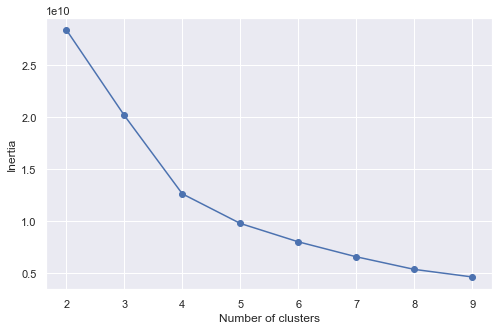

In [69]:

scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(cluster_data)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,10), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- #### From the ElbowCurve we will pick k value as 4 or 5

### <font  color = #E1ADA2  t>**Calculating SilhouetteScore For Each Cluster**<font>
- The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [70]:
for i in range(4,10):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(cluster_data)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(cluster_data,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 4 clusters k-means : 0.656 
Silhouette score for 5 clusters k-means : 0.671 
Silhouette score for 6 clusters k-means : 0.604 
Silhouette score for 7 clusters k-means : 0.609 
Silhouette score for 8 clusters k-means : 0.631 
Silhouette score for 9 clusters k-means : 0.635 


- Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 5 according to K-Means Algorithm. So I have determined 5 as the k values of the K-means model.

- <font  color = #E1ADA2  t>**Fitting K-Means Algorithm with n_clusters = 5**<font>

In [71]:
kmeans_labels=KMeans(n_clusters=5,random_state=123).fit_predict(cluster_data)

- <font  color = #E1ADA2  t>**Applying PCA**<font>

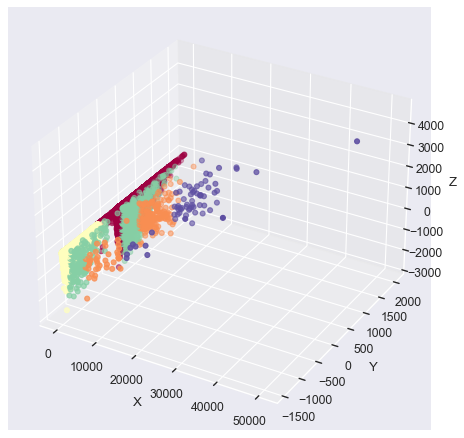

In [72]:

pca = PCA(n_components=3).fit_transform(cluster_data)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

- <font  color = #E1ADA2  t>**Calculating How many number of customers belongs to Each Cluster**<font>

In [76]:
cluster_data['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(cluster_data['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

0     2     3    1   4
Number of Customers  18250  4272  1003  229  66

- From the above dataframe Cluster_0 contain more number of customer

In [77]:
cluster_data.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'EmailType_CustomizedEmail', 'MailOpened_no',
       'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes', 'totalOrders',
       'OrderFrequency', 'numberOfDaysWithBusiness', 'makingBusiness',
       'ordergap', 'Clusters'],
      dtype='object')

- For the numerical variables we have taken mean as aggregation function with cluster group as a index

In [78]:
cluster_data.set_index('Clusters')
grouped_num=cluster_data.groupby(by='Clusters').mean().round(1)
grouped_num = grouped_num.loc[:,['EmailType_CustomizedEmail', 'MailOpened_no',
                    'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes', 'totalOrders',
                    'OrderFrequency', 'numberOfDaysWithBusiness', 'makingBusiness',
                   'ordergap']]
grouped_num

EmailType_CustomizedEmail  MailOpened_no  MailOpened_yes  \
Clusters                                                             
0                              19.3           14.7             5.6   
1                              44.0           25.9            19.0   
2                              20.5           15.4             6.1   
3                              40.5           28.0            13.5   
4                              47.4           30.9            17.5   

          MailClicked_no  MailClicked_yes  totalOrders  OrderFrequency  \
Clusters                                                                 
0                   18.3              1.0        139.0             2.2   
1                   39.4              4.6       7626.0            74.9   
2                   19.3              1.1        158.8             2.5   
3                   37.6              2.8       2373.6            28.5   
4                   44.0              3.4      17813.0           118.8   

          numberOfDaysWithBusiness  makingBusiness  ordergap  
Clusters                                                      
0                             75.4            51.7    1716.9  
1                            884.7           864.3    1289.8  
2                             82.8            59.7     200.0  
3                            619.3           607.2    1403.0  
4                           1078.8           994.0    1314.0

- Dummifying the the categorical columns inorder to get the frequency of each column and cluster group set as a index

In [80]:
cluster_data_exp = pd.get_dummies(data=cluster_data_1, columns=['City', 'OnlineCommunication','PreferredDeliveryDay','RetentionPotential'])

In [81]:
cluster_data_exp['Clusters'] = cluster_data['Clusters']

In [82]:
cluster_data_exp.columns

Index(['AutomaticRefill', 'DoorstepDelivery', 'EmailType_CustomizedEmail',
       'MailOpened_no', 'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes',
       'totalOrders', 'OrderFrequency', 'numberOfDaysWithBusiness',
       'makingBusiness', 'ordergap', 'City_CITY1', 'City_CITY2', 'City_CITY3',
       'City_CITY4', 'OnlineCommunication_0', 'OnlineCommunication_1',
       'PreferredDeliveryDay_Friday', 'PreferredDeliveryDay_Monday',
       'PreferredDeliveryDay_Saturday', 'PreferredDeliveryDay_Sunday',
       'PreferredDeliveryDay_Thursday', 'PreferredDeliveryDay_Tuesday',
       'PreferredDeliveryDay_Wednesday', 'RetentionPotential_High',
       'RetentionPotential_Low', 'RetentionPotential_Medium', 'Clusters'],
      dtype='object')

- Groupby with cluster group & categorical columns

In [84]:
cluster_data_exp.set_index('Clusters')
grouped_cat = cluster_data_exp.groupby('Clusters').agg(RetentionPotential_High = ('RetentionPotential_High',np.count_nonzero ),
                                              RetentionPotential_Low = ('RetentionPotential_Low',np.count_nonzero ),
                                              RetentionPotential_Medium = ('RetentionPotential_Medium',np.count_nonzero ),
                                              City_CITY1 = ('City_CITY1',np.count_nonzero ),
                                              City_CITY2 = ('City_CITY2',np.count_nonzero ),                                            
                                              City_CITY3 = ('City_CITY3',np.count_nonzero ),                                             
                                              City_CITY4 = ('City_CITY4',np.count_nonzero ),  
                                              OnlineCommunication_0 = ('OnlineCommunication_0',np.count_nonzero ),
                                              OnlineCommunication_1 = ('OnlineCommunication_1',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Friday = ('PreferredDeliveryDay_Friday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Monday = ('PreferredDeliveryDay_Monday',np.count_nonzero ),
                                              PreferredDeliveryDay_Saturday = ('PreferredDeliveryDay_Saturday',np.count_nonzero ),
                                              PreferredDeliveryDay_Sunday = ('PreferredDeliveryDay_Sunday',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Thursday = ('PreferredDeliveryDay_Thursday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Tuesday = ('PreferredDeliveryDay_Tuesday',np.count_nonzero ),  
                                              PreferredDeliveryDay_Wednesday = ('PreferredDeliveryDay_Wednesday',np.count_nonzero ),
                                    
                                                      )
grouped_cat                                                  

RetentionPotential_High  RetentionPotential_Low  \
Clusters                                                    
0                            3144                   14557   
1                               0                     200   
2                             609                    3531   
3                               3                     842   
4                               0                      55   

          RetentionPotential_Medium  City_CITY1  City_CITY2  City_CITY3  \
Clusters                                                                  
0                               549        1025        5088        5081   
1                                29           4         134          13   
2                               132         247        1056        1296   
3                               158          32         548          98   
4                                11           0          53           2   

          City_CITY4  OnlineCommunication_0  OnlineCommunication_1  \
Clusters                                                             
0               7056                   6172                  12078   
1                 78                     99                    130   
2               1673                   1218                   3054   
3                325                    576                    427   
4                 11                     24                     42   

          PreferredDeliveryDay_Friday  PreferredDeliveryDay_Monday  \
Clusters                                                             
0                                3224                         3949   
1                                  43                           70   
2                                 727                          949   
3                                 165                          308   
4                                   8                           24   

          PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
Clusters                                                               
0                                   780                          150   
1                                     2                            0   
2                                   198                           30   
3                                    23                            6   
4                                     0                            0   

          PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
Clusters                                                                
0                                  3141                          4058   
1                                    35                            49   
2                                   717                           998   
3                                   140                           219   
4                                    10                            19   

          PreferredDeliveryDay_Wednesday  
Clusters                                  
0                                   2948  
1                                     30  
2                                    653  
3                                    142  
4                                      5

- Merging both categorical & numerical gropby dataframes

In [ ]:
final_cluster = grouped_num.merge(grouped_cat,how='inner',on='Clusters')
final_cluster

EmailType_CustomizedEmail  MailOpened_no  MailOpened_yes  \
Clusters                                                             
0                              19.3           14.7             5.6   
1                              44.0           25.9            19.0   
2                              20.5           15.4             6.1   
3                              40.5           28.0            13.5   
4                              47.4           30.9            17.5   

          MailClicked_no  MailClicked_yes  totalOrders  OrderFrequency  \
Clusters                                                                 
0                   18.3              1.0        139.0             2.2   
1                   39.4              4.6       7626.0            74.9   
2                   19.3              1.1        158.8             2.5   
3                   37.6              2.8       2373.6            28.5   
4                   44.0              3.4      17813.0           118.8   

          numberOfDaysWithBusiness  makingBusiness  ordergap  \
Clusters                                                       
0                             75.4            51.7    1716.9   
1                            884.7           864.3    1289.8   
2                             82.8            59.7     200.0   
3                            619.3           607.2    1403.0   
4                           1078.8           994.0    1314.0   

          RetentionPotential_High  RetentionPotential_Low  \
Clusters                                                    
0                            3144                   14557   
1                               0                     200   
2                             609                    3531   
3                               3                     842   
4                               0                      55   

          RetentionPotential_Medium  City_CITY1  City_CITY2  City_CITY3  \
Clusters                                                                  
0                               549        1025        5088        5081   
1                                29           4         134          13   
2                               132         247        1056        1296   
3                               158          32         548          98   
4                                11           0          53           2   

          City_CITY4  OnlineCommunication_0  OnlineCommunication_1  \
Clusters                                                             
0               7056                   6172                  12078   
1                 78                     99                    130   
2               1673                   1218                   3054   
3                325                    576                    427   
4                 11                     24                     42   

          PreferredDeliveryDay_Friday  PreferredDeliveryDay_Monday  \
Clusters                                                             
0                                3224                         3949   
1                                  43                           70   
2                                 727                          949   
3                                 165                          308   
4                                   8                           24   

          PreferredDeliveryDay_Saturday  PreferredDeliveryDay_Sunday  \
Clusters                                                               
0                                   780                          150   
1                                     2                            0   
2                                   198                           30   
3                                    23                            6   
4                                     0                            0   

          PreferredDeliveryDay_Thursday  PreferredDeliveryDay_Tuesday  \
Clusters                             

In [ ]:
len(final_cluster.columns)

26

In [ ]:
features = final_cluster.columns

- <font  color = #E1ADA2  t>**Cluster Analysis On Each variable with corresponding cluster group**<font>

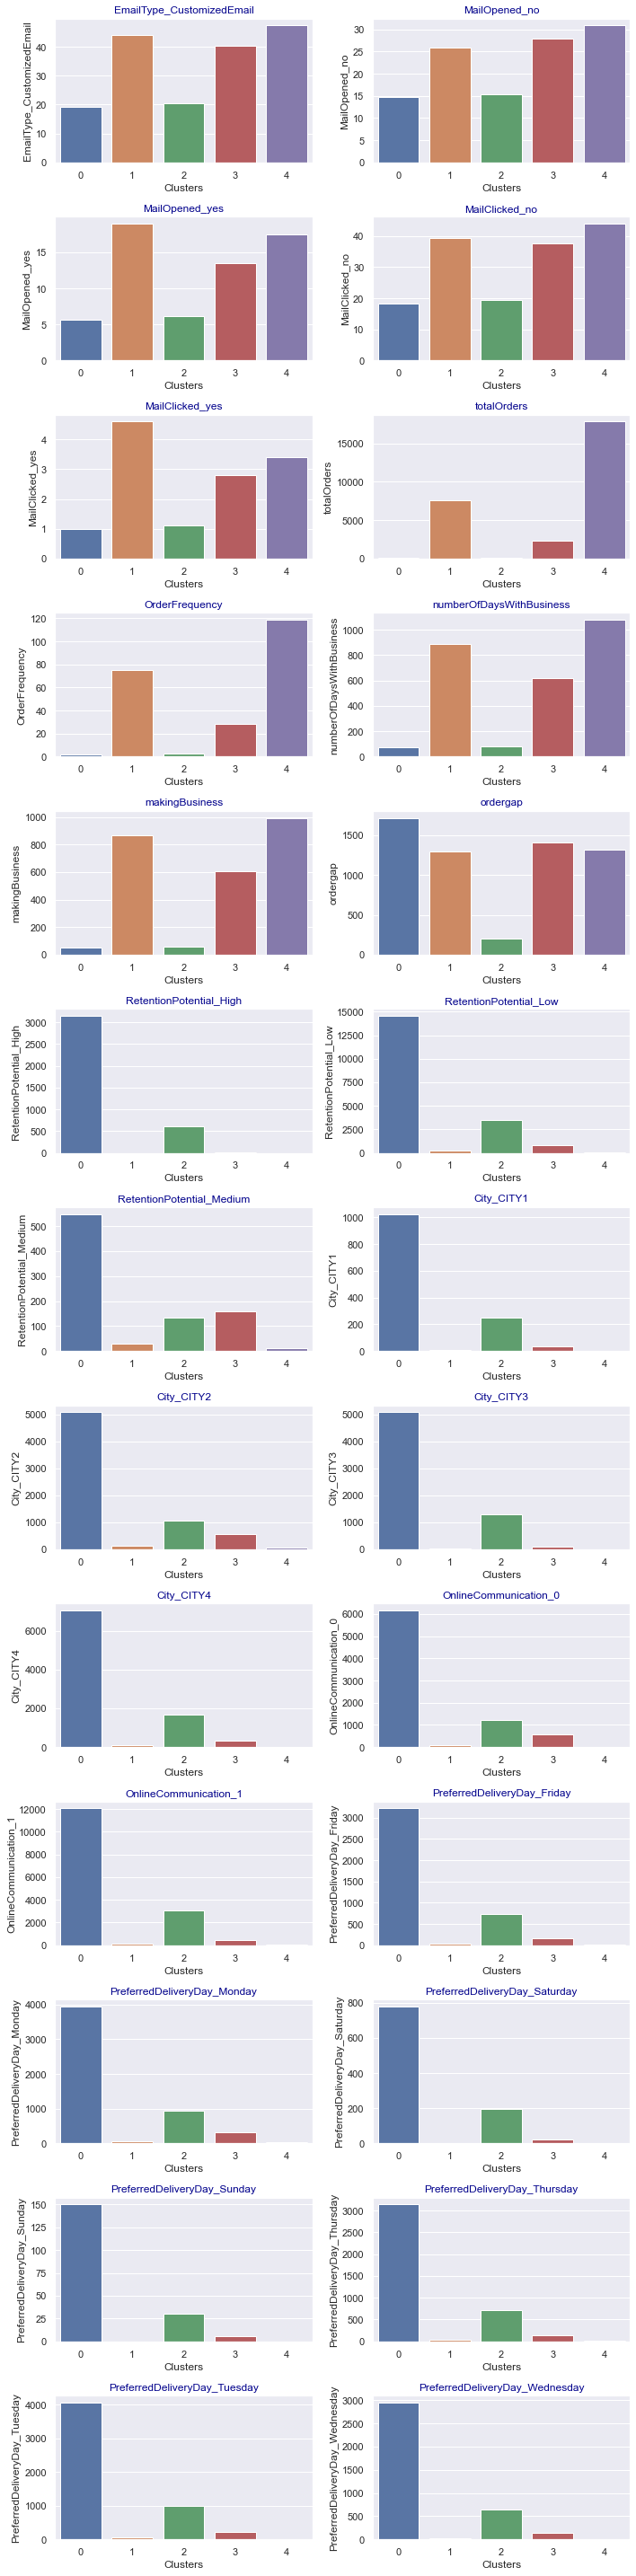

In [ ]:
plt.figure(figsize=(10,40))
for i,j in enumerate(features):
    plt.subplot(13,2,i+1)
    sns.barplot(final_cluster.index,final_cluster[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

### <font  color = #E1ADA2  t>**Insights On Each variable with corresponding cluster group**<font>

- Cluster 4 is witnessing more mean value which means that more customized emails have been sent to them.
- Though the more mails have been sent to Cluster 4, yet they haven't opened mails.
- Cluster 1 has an exponential raise in opening the mails sent.
- Clsuter 4 denied to click on the mails sent and witnessing the surge here and followed by cluster1.
- Cluster 1 is instrested to check and Clicked on mails been sent.
- Total orders are more seen in cluster 4.
- Order Frequency are more seen in cluster 4.
- Number of days with bussiness has been seen more with cluster 4.
- Making bussiness is been done with cluster 4.
- Cluster 0 is spotting more Order gaps in the bussiness.


- <font  color = #E1ADA2  t>**Insight:**</font>
- CLUSTER 4 - received more mails, but haven't opened mails and also denied to click the mails "yet they made more orders" consequently company is having good bussiness with clustwhater 4
- CLSUTER 0 - it is contributing less in all the attributes yet highest in order gap that means, it is not purchasing more.


- <font  color = #E1ADA2  t>**11- 26 graph:**</font>
- Low , high , medium retention potentail is seen unanimously in Cluster 0.
- In all the cities, cluster 0 is showing the high surgence.
- Online communication YES&NO- cluster 0
- Customers who came from Cluster 0, had requested for their preferred delivery day majorly.


### <font  color = #E1ADA2  t>**Another Method**</font>


- Splitting original dataframe into 3 categories(classes) i.e High,Medium,Low.
- Then applying cluster analysis on each individual classes.
- The main idea is to get more insights from the invidual data.

In [182]:
high = cluster_data_exp[cluster_data_exp['RetentionPotential']=='High']
low = cluster_data_exp[cluster_data_exp['RetentionPotential']=='Low']
medium = cluster_data_exp[cluster_data_exp['RetentionPotential']=='Medium']

In [183]:
high.drop('RetentionPotential',axis=1,inplace=True)
low.drop('RetentionPotential',axis=1,inplace=True)
medium.drop('RetentionPotential',axis=1,inplace=True)

In [184]:
high_exp = high.copy()
low_exp = low.copy()
medium_exp = medium.copy()

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['City','PreferredDeliveryDay']
for col in cat_cols:
    high[col] = le.fit_transform(high[col])
    low[col] = le.fit_transform(low[col])    
    medium[col] = le.fit_transform(medium[col])    

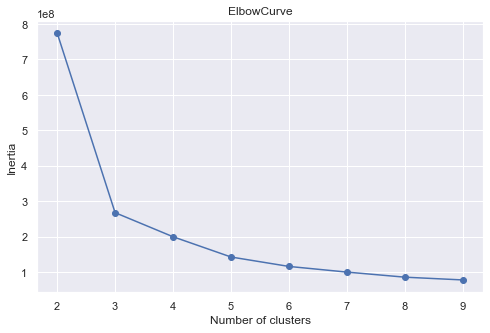

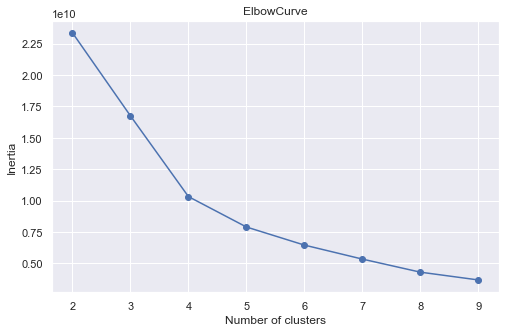

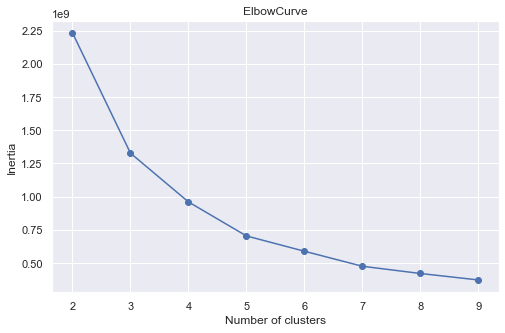

In [181]:
for i in [high,low,medium]:
    scores = []
    for k in range(2,10):
        km = KMeans(n_clusters=k,random_state=123)
        km = km.fit(i)
        scores.append(km.inertia_)
    dfk = pd.DataFrame()
    dfk = pd.DataFrame({'Cluster':range(2,10), 'Score':scores})
    plt.figure(figsize=(8,5))
    plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
    plt.title('ElbowCurve')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

<font  color = #E1ADA2  t>**ElbowCurve**</font>
- First Curve For high Retention data
- Second Curve For low Retention data
- Third Curve For medium Retention data

- #### For High Retention Data Calculating k value

In [186]:
for i in range(3,10):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(high)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(high,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 3 clusters k-means : 0.683 
Silhouette score for 4 clusters k-means : 0.677 
Silhouette score for 5 clusters k-means : 0.654 
Silhouette score for 6 clusters k-means : 0.61 
Silhouette score for 7 clusters k-means : 0.616 
Silhouette score for 8 clusters k-means : 0.617 
Silhouette score for 9 clusters k-means : 0.599 


- Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 3 according to K-Means Algorithm. So I have determined 3 as the k values of the K-means model.- 

- #### For low Retention Data Calculating k value

In [187]:
for i in range(3,10):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(low)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(low,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 3 clusters k-means : 0.641 
Silhouette score for 4 clusters k-means : 0.674 
Silhouette score for 5 clusters k-means : 0.689 
Silhouette score for 6 clusters k-means : 0.692 
Silhouette score for 7 clusters k-means : 0.681 
Silhouette score for 8 clusters k-means : 0.635 
Silhouette score for 9 clusters k-means : 0.642 


- Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 6 according to K-Means Algorithm. So I have determined 6 as the k values of the K-means model.- 

- #### For medium Retention Data Calculating k value

In [188]:
for i in range(3,10):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(medium)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(medium,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 3 clusters k-means : 0.689 
Silhouette score for 4 clusters k-means : 0.489 
Silhouette score for 5 clusters k-means : 0.496 
Silhouette score for 6 clusters k-means : 0.494 
Silhouette score for 7 clusters k-means : 0.478 
Silhouette score for 8 clusters k-means : 0.349 
Silhouette score for 9 clusters k-means : 0.366 


- Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 3 according to K-Means Algorithm. So I have determined 3 as the k values of the K-means model.- 

In [189]:
kmeans_labels_high = KMeans(n_clusters=3,random_state=123).fit_predict(high)
kmeans_labels_low = KMeans(n_clusters=6,random_state=123).fit_predict(low)
kmeans_labels_medium = KMeans(n_clusters=3,random_state=123).fit_predict(medium)


In [190]:
kmeans_labels_high

array([1, 2, 1, ..., 0, 0, 0])

- <font  color = #E1ADA2  t>Applying PCA and visualizing the clusters on High Retention Data</font>


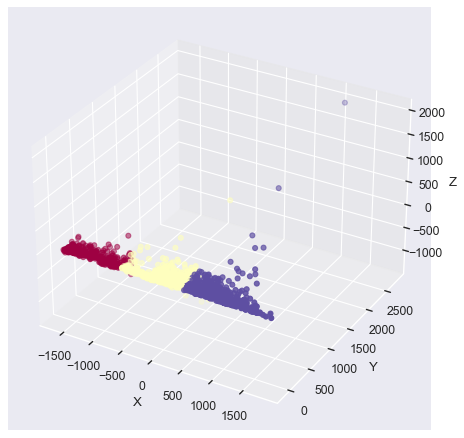

In [193]:
pca = PCA(n_components=3).fit_transform(high)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels_high,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

- <font  color = #E1ADA2  t>Applying PCA and visualizing the clusters on Low Retention Data</font>


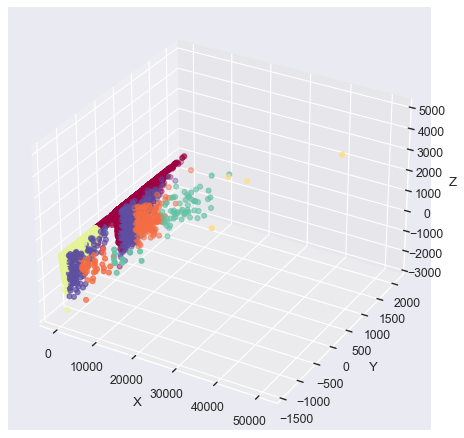

In [194]:
pca = PCA(n_components=3).fit_transform(low)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels_low,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

- <font  color = #E1ADA2  t>Applying PCA and visualizing the clusters on Medum Retention Data</font>

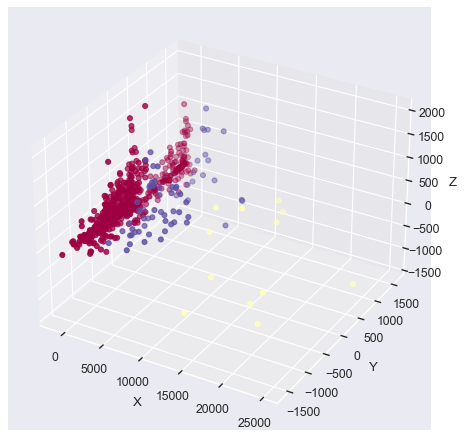

In [196]:
pca = PCA(n_components=3).fit_transform(medium)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels_medium,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [204]:
high['Clusters']=list(kmeans_labels_high)
(pd.DataFrame(high['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})).T


1     2    0
Number of Customers  2062  1051  643

- More Number Of Customers in Cluster1 

In [205]:
low['Clusters']=list(kmeans_labels_low)
(pd.DataFrame(low['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})).T


0     3    5    1   4  2
Number of Customers  14494  3484  909  221  73  4

- More Number Of Customers in Cluster_0

In [206]:
medium['Clusters']=list(kmeans_labels_medium)
(pd.DataFrame(medium['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})).T

0   2   1
Number of Customers  800  67  12

- More Number Of Customers in Cluster_0

In [207]:
high.set_index('Clusters')
grouped_num_high=high.groupby(by='Clusters').mean().round(1)
grouped_num_high = grouped_num.loc[:,['EmailType_CustomizedEmail', 'MailOpened_no',
                    'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes', 'totalOrders',
                    'OrderFrequency', 'numberOfDaysWithBusiness', 'makingBusiness',
                   'ordergap']]
grouped_num_high

EmailType_CustomizedEmail  MailOpened_no  MailOpened_yes  \
Clusters                                                             
0                               3.0            2.1             1.9   
1                               3.5            2.4             2.1   
2                               0.8            0.6             1.2   

          MailClicked_no  MailClicked_yes  totalOrders  OrderFrequency  \
Clusters                                                                 
0                    2.9              0.2         72.5             1.3   
1                    3.3              0.2         70.7             1.3   
2                    0.7              0.0         89.1             1.6   

          numberOfDaysWithBusiness  makingBusiness  ordergap  
Clusters                                                      
0                             11.1            18.2     364.8  
1                             16.3            20.5    1623.4  
2                              3.5            20.8    2483.1

- Aggregating numerical columns with mean by cluster id as index

In [208]:
low.set_index('Clusters')
grouped_num_low=low.groupby(by='Clusters').mean().round(1)
grouped_num_low = grouped_num.loc[:,['EmailType_CustomizedEmail', 'MailOpened_no',
                    'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes', 'totalOrders',
                    'OrderFrequency', 'numberOfDaysWithBusiness', 'makingBusiness',
                   'ordergap']]

medium.set_index('Clusters')
grouped_num_medium=medium.groupby(by='Clusters').mean().round(1)
grouped_num_medium = grouped_num.loc[:,['EmailType_CustomizedEmail', 'MailOpened_no',
                    'MailOpened_yes', 'MailClicked_no', 'MailClicked_yes', 'totalOrders',
                    'OrderFrequency', 'numberOfDaysWithBusiness', 'makingBusiness',
                   'ordergap']]

- Dummifying the the categorical columns inorder to get the frequency of each column and cluster group set as a index

In [209]:
cluster_data_high = pd.get_dummies(data=high_exp, columns=['City', 'OnlineCommunication','PreferredDeliveryDay'])
cluster_data_low = pd.get_dummies(data=low_exp, columns=['City', 'OnlineCommunication','PreferredDeliveryDay'])
cluster_data_medium = pd.get_dummies(data=medium_exp, columns=['City', 'OnlineCommunication','PreferredDeliveryDay'])

In [210]:
cluster_data_high['Clusters'] = high['Clusters']
cluster_data_low['Clusters'] = low['Clusters']
cluster_data_medium['Clusters'] = medium['Clusters']

- Aggregating Categorical columns with frequency by cluster id as index

In [212]:
cluster_data_high.set_index('Clusters')
grouped_cat_high = cluster_data_high.groupby('Clusters').agg(
                                              City_CITY1 = ('City_CITY1',np.count_nonzero ),
                                              City_CITY2 = ('City_CITY2',np.count_nonzero ),                                            
                                              City_CITY3 = ('City_CITY3',np.count_nonzero ),                                             
                                              City_CITY4 = ('City_CITY4',np.count_nonzero ),  
                                              OnlineCommunication_0 = ('OnlineCommunication_0',np.count_nonzero ),
                                              OnlineCommunication_1 = ('OnlineCommunication_1',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Friday = ('PreferredDeliveryDay_Friday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Monday = ('PreferredDeliveryDay_Monday',np.count_nonzero ),
                                              PreferredDeliveryDay_Saturday = ('PreferredDeliveryDay_Saturday',np.count_nonzero ),
                                              PreferredDeliveryDay_Sunday = ('PreferredDeliveryDay_Sunday',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Thursday = ('PreferredDeliveryDay_Thursday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Tuesday = ('PreferredDeliveryDay_Tuesday',np.count_nonzero ),  
                                              PreferredDeliveryDay_Wednesday = ('PreferredDeliveryDay_Wednesday',np.count_nonzero ),
                                    
                                                      )
cluster_data_low.set_index('Clusters')
grouped_cat_low = cluster_data_low.groupby('Clusters').agg(
                                              City_CITY1 = ('City_CITY1',np.count_nonzero ),
                                              City_CITY2 = ('City_CITY2',np.count_nonzero ),                                            
                                              City_CITY3 = ('City_CITY3',np.count_nonzero ),                                             
                                              City_CITY4 = ('City_CITY4',np.count_nonzero ),  
                                              OnlineCommunication_0 = ('OnlineCommunication_0',np.count_nonzero ),
                                              OnlineCommunication_1 = ('OnlineCommunication_1',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Friday = ('PreferredDeliveryDay_Friday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Monday = ('PreferredDeliveryDay_Monday',np.count_nonzero ),
                                              PreferredDeliveryDay_Saturday = ('PreferredDeliveryDay_Saturday',np.count_nonzero ),
                                              PreferredDeliveryDay_Sunday = ('PreferredDeliveryDay_Sunday',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Thursday = ('PreferredDeliveryDay_Thursday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Tuesday = ('PreferredDeliveryDay_Tuesday',np.count_nonzero ),  
                                              PreferredDeliveryDay_Wednesday = ('PreferredDeliveryDay_Wednesday',np.count_nonzero ),
                                    
                                                      )                                              
cluster_data_medium.set_index('Clusters')
grouped_cat_medium = cluster_data_medium.groupby('Clusters').agg(
                                              City_CITY1 = ('City_CITY1',np.count_nonzero ),
                                              City_CITY2 = ('City_CITY2',np.count_nonzero ),                                            
                                              City_CITY3 = ('City_CITY3',np.count_nonzero ),                                             
                                              City_CITY4 = ('City_CITY4',np.count_nonzero ),  
                                              OnlineCommunication_0 = ('OnlineCommunication_0',np.count_nonzero ),
                                              OnlineCommunication_1 = ('OnlineCommunication_1',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Friday = ('PreferredDeliveryDay_Friday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Monday = ('PreferredDeliveryDay_Monday',np.count_nonzero ),
                                              PreferredDeliveryDay_Saturday = ('PreferredDeliveryDay_Saturday',np.count_nonzero ),
                                              PreferredDeliveryDay_Sunday = ('PreferredDeliveryDay_Sunday',np.count_nonzero ),                                            
                                              PreferredDeliveryDay_Thursday = ('PreferredDeliveryDay_Thursday',np.count_nonzero ),                                             
                                              PreferredDeliveryDay_Tuesday = ('PreferredDeliveryDay_Tuesday',np.count_nonzero ),  
                                              PreferredDeliveryDay_Wednesday = ('PreferredDeliveryDay_Wednesday',np.count_nonzero ),
                                    
                                                      )                                              

In [213]:
final_cluster_high = grouped_num_high.merge(grouped_cat_high,how='inner',on='Clusters')
final_cluster_low = grouped_num_low.merge(grouped_cat_low,how='inner',on='Clusters')
final_cluster_medium = grouped_num_medium.merge(grouped_cat_medium,how='inner',on='Clusters')


In [216]:
features_high =  final_cluster_high.columns
features_low =  final_cluster_low.columns
features_medium =  final_cluster_medium.columns

### <font  color = #E1ADA2  t>Cluster Analysis On High RetentionPotential Data with Each column</font>

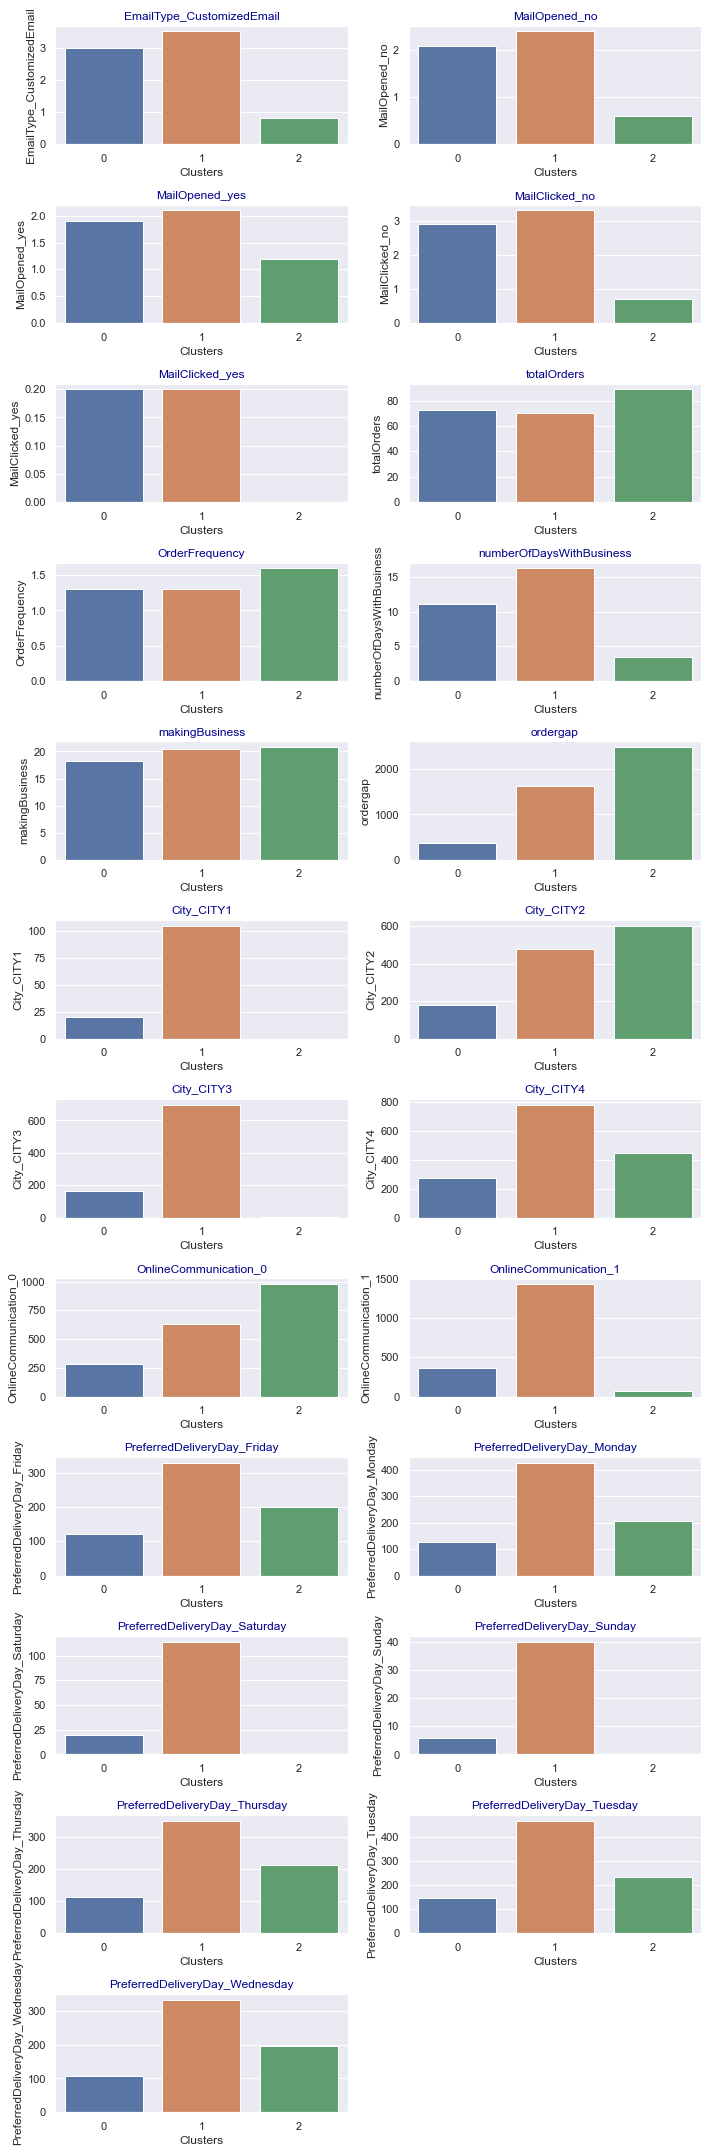

In [225]:
plt.figure(figsize=(10,30))
for i,j in enumerate(features_high):
    plt.subplot(12,2,i+1)
    sns.barplot(final_cluster_high.index,final_cluster_high[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

## <font  color = #E1ADA2  t>Summary of the all graphs by using the cluster's for feature High</font>

- In the Cluster 1 has high mean of email in Customized emails and the cluster 0 and 2 less compare to the cluster1
- In the variable No Malied Open feature the number of the mailed open does not open in the cluster 1 only has we compared to he cluster 0 And the cluster 2 has least number of malied opened.
- The number of mails seen in by the custmer, most number of the seen mails belongs to the cluster1 and cluster almost same, and the cluster 0 has least by seening the mails seen custmers.
- The number of the custmers belongs to the culsters, by the variable of no custmer Clicked mails, belongs to the cluster 1 and 0, cluster 1 has more compared to cluster 0 and clsuter 2 has least custmers.
- The number of custmer's Clicked mails, The custmer whole are Clicked the mails more has cluster o and cluster 1 has same number of custmer's. Where has there no number of custmer's belongs to the cluster 2.
- The total Orders variable the more number of custmer's belongs to the clsuter 2, where has the cluster 0 and 1 slightly equal number of custmers, The custmer's belongs to the cluster 0 and 1 less to cluster 2 custmer's.
- For the number of custmer's OrderFrequenc are, The custmer's order the more belongs to the cluster 2. And the Cluster 0 and 1 are equal number of custmer's ordered.
- In number of day business happend, the clsuter 1 has the more business happend, and the clsuter 0 has less number of business occured while compared to cluster 1, and the cluster 2 has least number of cluster's occured in the number of day business occured.
- In the making business, the number of custmer's almost same in each cluster 0, cluster1, and cluster2.
- The number of order gap between the custmer's, the number of custmers occured in the cluster 2, and the cluster 1 has less and cluster 0 has least number of custmer's order gap there.
- In city1 Custmer's occured more the clsuter 1 and were as cluster 0 as 20 custmers are occured, while in the cluster 2 has no custmer's are paticpated.
- In the city2 has more number of the custmer's belongs to cluster 2, while in the cluster 1 has 400 custmer's and in the cluster 0 has the 200 number of custmer's occured.
- In city3 it is same to the city1 while the figure number of custmer's are raise, while coming to the figures in the city3 cluster 1 has more 600 custmer's and in the cluster 0 has nealy 200 custmer's are there, were as no custmer's are there in the clsuter 2.
- In city4 the more number no custmer are belongs to the cluster 1 nearly 800 custmers, Where as cluster 2 and cluster 0 has less number of custmer's are there.
- In the online communication, the number of custmer's not communicate has belongs to cluster 2 are more, while the cluster 1 and 0.
- In the online communication, the number of custmer's are communicate belongs to cluster 1, in the cluster o has nearly 300 custmers and in the cluster 2 has least number of customer nearly 50.
- Deliveries on the Firday, more number of custmer's belongs to the cluster 1, and in the cluster 2 has more than cluster 0 number of custmer's are there.
- Delivers on the monday has similar number of custmer's are belongs to cluster are same to Friday's clusters custmer's.
- Delivers on the saturday, the more number of custmer's are belongs to the cluster 1 and cluster 0 has less while in the clsuter 2 has no custmer's.
- Delivers on the sunday has similar number of custmer's are belongs to cluster are same to saturday's clusters custmer's.
- Delivers on the thursday has more number of custmer's are belongs to clsuter 1 and cluster 2 and 0 are less compare to the cluster 1.
- Delivers on the tuesday has similar to the thursday's cluster custmers.
- Delivers on the wednesday also has same number of cluster and same number of custmer's are equal.

### <font  color = #E1ADA2  t>Cluster Analysis On Low RetentionPotential Data with Each column</font>

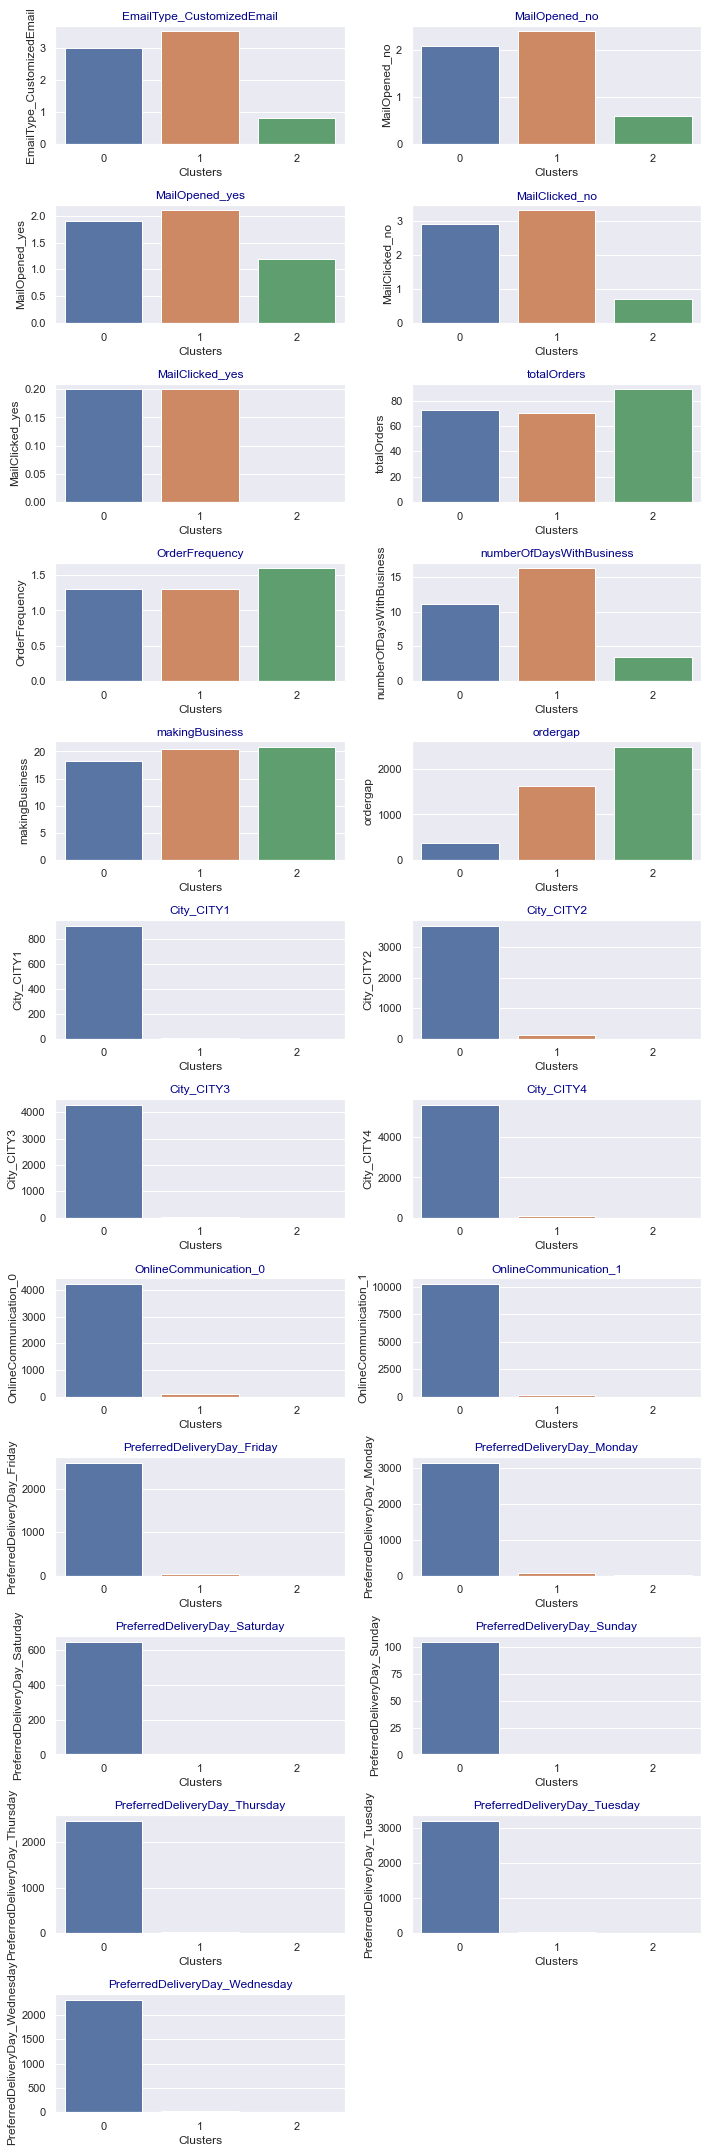

In [228]:
plt.figure(figsize=(10,30))
for i,j in enumerate(features_low):
    plt.subplot(12,2,i+1)
    sns.barplot(final_cluster_low.index,final_cluster_low[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

### <font  color = #E1ADA2 >We can summarize the all the graphs by the using the cluster's for feature Low.</font>


- Cluster 0: The more number of custmer's are occured in this cluster, the variables are City 1, City 2, city3, City4,
  Online Communication no, Online Communication yes, Deliveries on the Friday, Monday, Saturday, Sunday,                     Thurday, tuesday and wednesy these custmer's are occured in the cluster 0. 
                
- Cluster 1: The number of custmer's are occured in this cluster, the variables are Customized emails, No Mail opened,                 Yes Mail opened, No Mail clicked, Yes Mali Clicked, in these variables the cluster 1 has more number of                     custmer's occured.While in the other varibles like Total order, Order frequency, Number of Business days,                   Making Business and Ordergap are some custmer's are occured. In the reaming features no custmers are                       ocuured; 
    
- Cluster 2: In this cluster number of custmer are occured, in the variables Total order, Order frequency, Making                        Business and Order gap these feature are more number of custmers are occured. While in the other features                  some less in the feature are Eamil type customized type, No Mail Open, Yes Mail Open, No Mail Clicked and                  Number of Day's with Business. While in the other feature there is no single custmer's are not occured.
   
This is the conlusion of the features low. 

## <font  color = #E1ADA2  t>Cluster Analysis On Medium RetentionPotential Data with Each column</font>

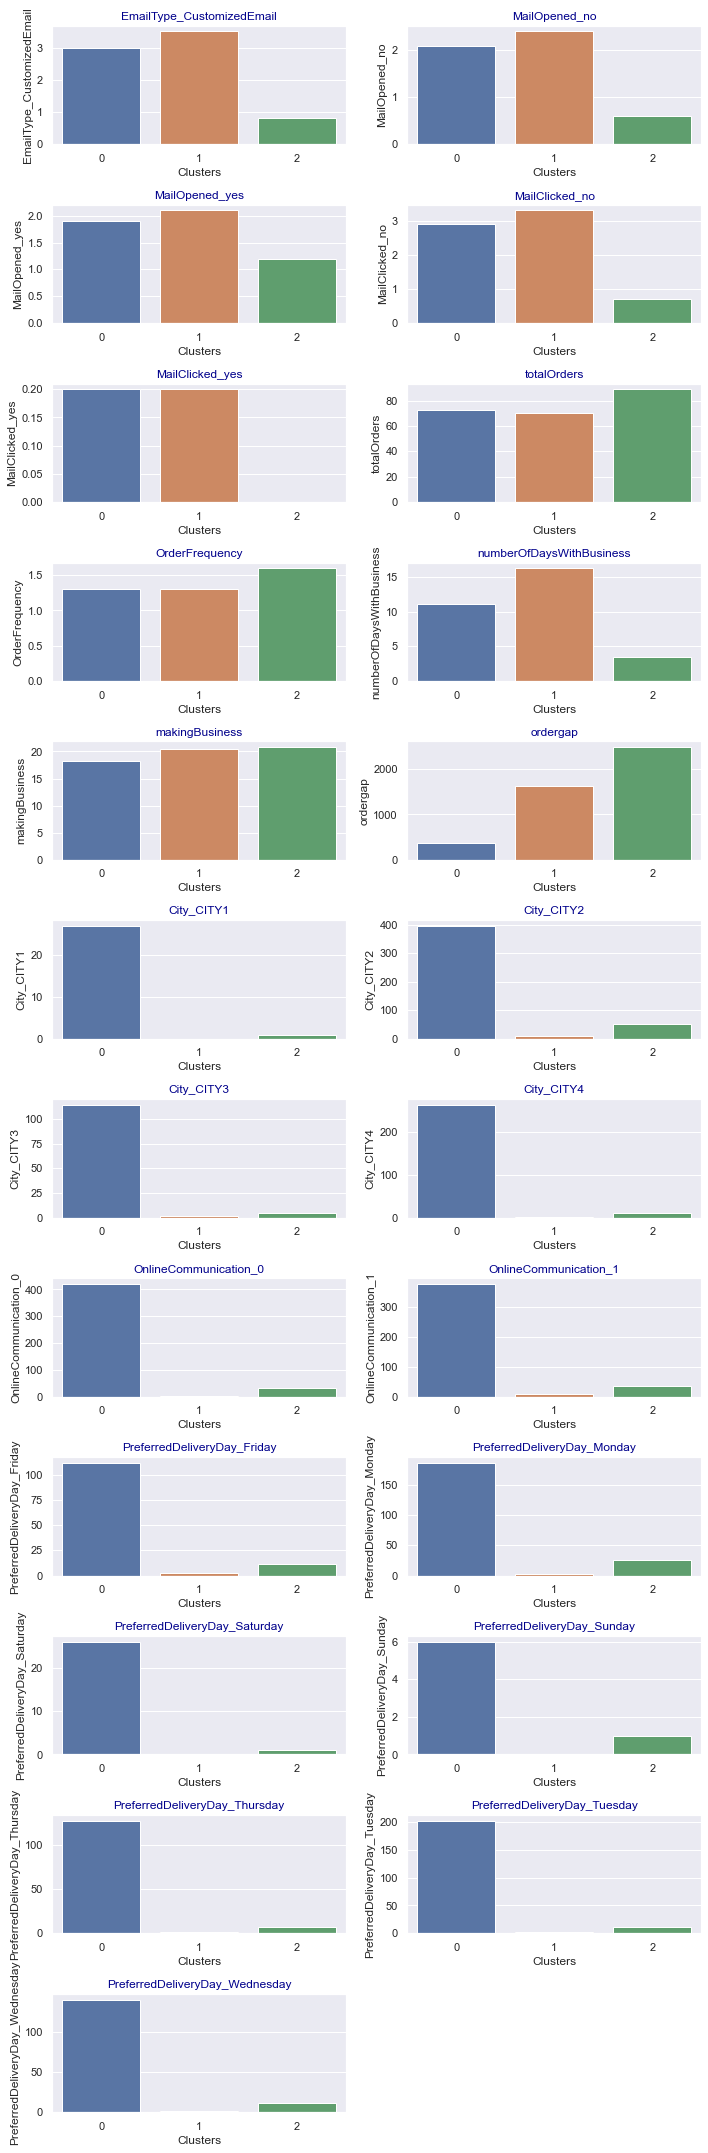

In [229]:
plt.figure(figsize=(10,30))
for i,j in enumerate(features_medium):
    plt.subplot(12,2,i+1)
    sns.barplot(final_cluster_medium.index,final_cluster_medium[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

### <font  color = #E1ADA2  t>Summary of the all graphs by using the cluster's for feature Medium</font>


- Cluster 0: In this cluster all the features custmers are occurred in almost all the features medium, In the all the features the number of custmers are domination in all features.

- Cluster 1: In this clsuter only feww features are occured in this cluster they are Email Type Customized, No Mailed Open, Yes Mailed Open,No Mail Clicked, Yes Mail Clicked, Total Orders, Order Frequency, Number of Days with business, making business, ordergap. These feature medium are more number of custmer are ocuured.

- Cluster 2: In this cluster only few custmers are occured in the features are, Total orders, Order Frequency, Making Business, Order gap. While in the other features least number of custmer are occured in the participated.

This is the conlusion of fetures medium.

### <font  color = #E1ADA2  t>CONCLUSION</font>
- By and large in our customers circle classification, customers do fall under the bracket(categorization) – LOW, MEDIUM, HIGH Retention Potentiality in any sort of industries.
- In order meet the profitability expectations without facing the condition of attrition, 
1. Have to ensure that we have to centralize(concentrate) more on our medium retention potentiality customers in which our vigorous efforts have to lead them the way to high potentiality category consequentially (as a result).

2. For customers who shows us high potentiality, we have to make them satisfactory by laying out their needs without any complacency as usually.
3. Here another focus has to be on the people who tends to have low retention potentiality by improving the approaching analysis with captivating & fascinating attempts from our end to pull customers towards purchasing/using services with our company. 

#### <font  color = #E1ADA2  t>Attributes to work on:</font>

- Entice(attract) new customers using social media & social media giveaways during peak time, Improvisation of website’s search engine optimization, Marketing- frequent engaging with loyal customers, People in India are not richest majorly and category may drop under middle class – can say that we have collaborated with local business partners with minimal prices in which we are encouraging our local brands, Recontact old customers, Analyse through Geographic locality(classy, ethnic- what are they up-to ), collaborating credit card to give them offers(discounts) , Online advertising, Promotional activities in WhatsApp, Facebook, Instagram; Can make suggestions using recommendation engine algorithms( if you buy this, you may also like this bottom to the item they purchase), Robust exchange offers etc.
- These are few lists of ideas in which we may evolve and develop in business perspective.